In [1]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import cPickle as pickle
except:
    import pickle

#No Clustering

The "no clustering" analysis is for us to analyze the aggregate I/O of all the jobs on a scatter matrix to look for possible patterns.

####Plotting parameters:
- Units : log_10[B]
- Converted log_10[0] to -2 

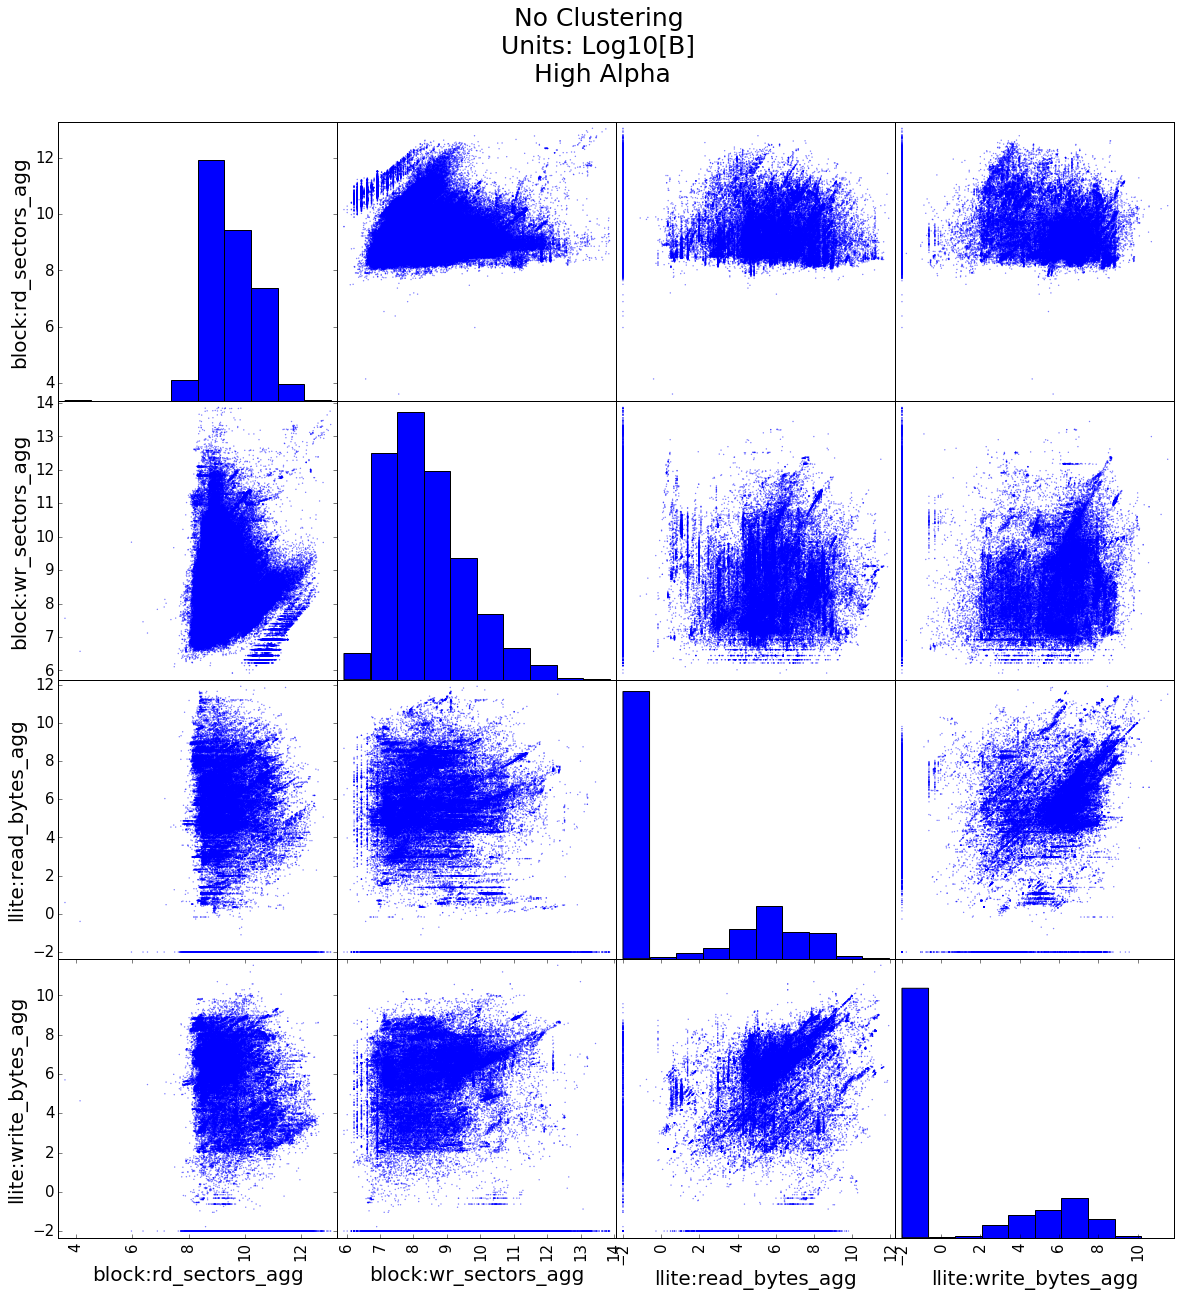

In [2]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

axl = scatter_matrix(ndf, alpha=0.5, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

plt.suptitle('No Clustering\nUnits: Log10[B]\n High Alpha', fontsize=25);

####Analysis:
- It's hard to see any distinct patterns. Hence, we will reduce the alpha value.

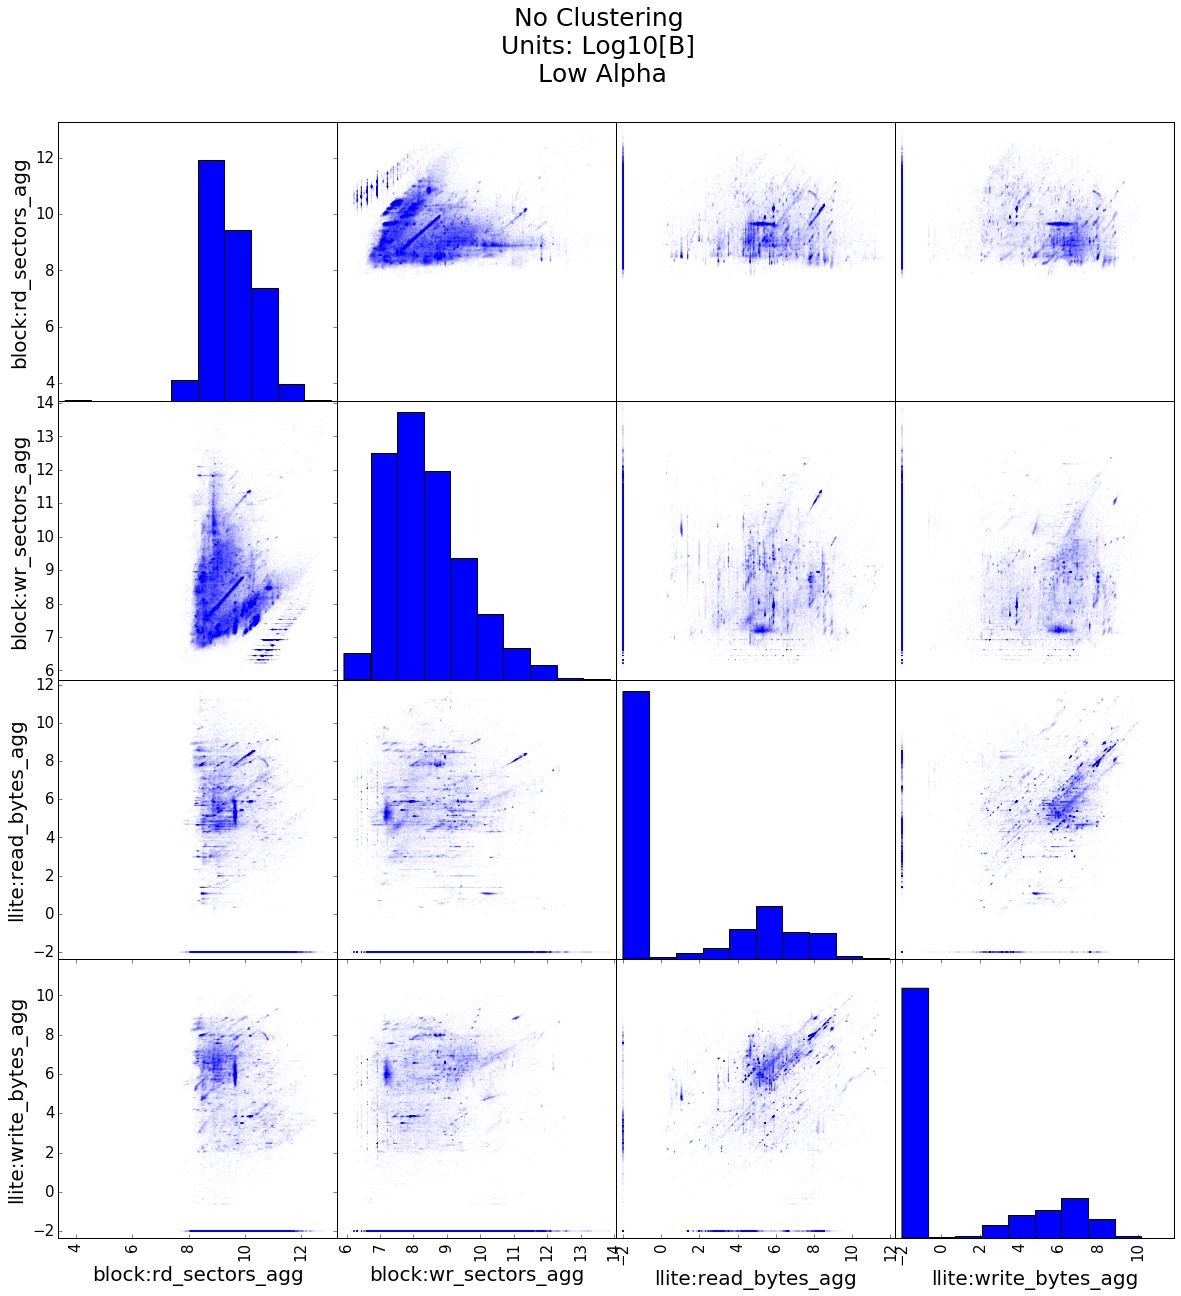

In [3]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

axl = scatter_matrix(ndf, alpha=0.02, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

plt.suptitle('No Clustering\nUnits: Log10[B]\n Low Alpha', fontsize=25);

####Analysis:
- We can see some linear relation and spots. 

####Analysis of linear relations:
- Correlation between block rd (X-axis) and block wr (Y-axis):
    1. When block read is between 10e^9 and 10e^10, and block write is between 10e^8 and 10e^9 (estimations), there is a clear dark linear line with a positive slope. The darkness of the line tells us about the density of jobs that fall in this pattern. The linear line tells us that there is a linear relationship between block read and block write within this IO range. There are an estimated 4500 jobs that fall on this line.
    2. When block read is between 10e^10 and 10e^12, and block write is between 10e^6.5 and 10e^8 (estimations), there are a set of horizontal lines that form a step-like formation. This tells us that there may be a pattern here, in which block read is reading in short chunks, while block write is inactive for that period of time.
    3. When block read is between 10e^9 and 10e^10.25, and block write is between 10e^10.5 and 10e^11.5 there is a fainter linear line. This shows that there may be another linear relationship here between block read and block write. The lightness of the line in comparison to the other darker linear line tells us that less jobs exhibit this behavior.
- Correlation between block rd (X-axis) and llite read (Y-axis):
    1. When block read is at 10e^9.5 (estimations) and llite read is between 10e^4.5 and 10e^6, there is a dark vertical line. This tells us that there may be a pattern here, in which llite read is increasing in IO but not block read is really occurring. The darkness of the line is interesting as it tells us that a good amount of jobs fall in this potential pattern. 
    2. When block read is between 10e^9.75 and 10e^10.25 and llite read is between 10e^7.75 and 10e^8.25, there is a linear line with a positive slope. Fainter than the vertical line but darker than the other parts of the scatter matrix, there may potentially be a linear correlation between block read and llite read during this range.
- Correlation between block rd (X-axis) and llite write (Y-axis):
    1. Similar to that of the vertical pattern in the block read versus llite read scatter matrix, there is a similarly shaped vertical line in the plotting of block read and llite write. When block read is at 10e^9.5 (same as the other scatter matrix) and llite write is between 10e^5.5 and 10e^6.5 this dense vertical line appears. While the estimated location for block read is the same, the range for llite write and llite read differ. However it is interesting to note this similarity.
- Correlation between block write (X-axis) and llite write (Y-axis):
    1. Between an estimated 10e^5.75 and 10e^7 for llite write and at 10e^7 for block write, there is a dense vertical line-like blob. While similar to that between block read and llite write, this vertical line is less of a line and more of a blob. This shows that there may be llite write activity happening while block write is inactive for this range.        
- Correlation between block write (X-axis) and llite read(Y-axis):
    1. Between 10e^4 and 10e^5.75 for llite read and at an estimated 10e^7 for block write, there is a similar blob-shaped vertical line. This shows that there may be llite read activity happening while block write is inactive for this range.
        
####Analysis of spots:
- Since there are a lot of spots on the cluster, we will pick them using k-means and DBSCAN clustering.

#Further Analysis of Lines

/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/IPython/kernel/__main__.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


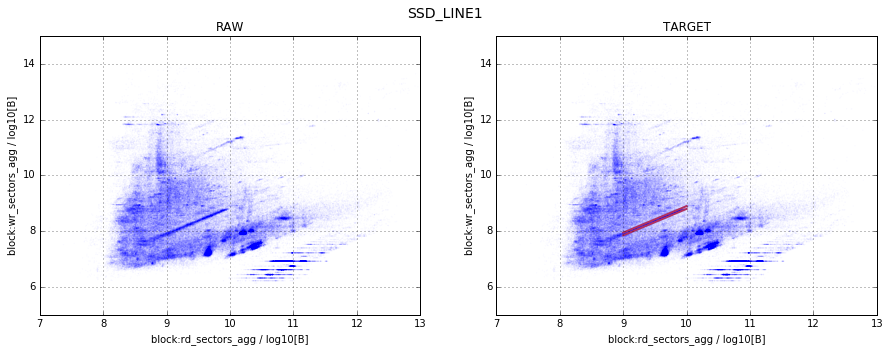

In [4]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

plt.figure(figsize=(15,5))
plt.suptitle('SSD_LINE1', fontsize=14)

plt.subplot(1,2,1)

ndf_x = ndf['block:rd_sectors_agg']
ndf_y = ndf['block:wr_sectors_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([7,13])
plt.xlabel('block:rd_sectors_agg / log10[B]')
plt.ylabel('block:wr_sectors_agg / log10[B]')
plt.title('RAW');
plt.grid()

plt.subplot(1,2,2)

ndf_x = ndf['block:rd_sectors_agg']
ndf_y = ndf['block:wr_sectors_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([7,13])
plt.xlabel('block:rd_sectors_agg / log10[B]')
plt.ylabel('block:wr_sectors_agg / log10[B]')
plt.title('TARGET');

x = np.linspace(9,10,10)
y1 = (0.95*x)-0.6
y2 = (0.95*x)-0.7
plt.plot(x, y1, '#b03060', linewidth=2)
plt.plot(x, y2, '#b03060', linewidth=2);
plt.grid()

cond1 = ndf['block:wr_sectors_agg']<(0.95*ndf['block:rd_sectors_agg'])-0.6
cond2 = ndf['block:wr_sectors_agg']>(0.95*ndf['block:rd_sectors_agg'])-0.7
cond3 = ndf['block:rd_sectors_agg']<10
cond4 = ndf['block:rd_sectors_agg']>8.9

#Getting JobNames
mega_df = pd.read_pickle('clean_merged.pkl') #For project ID
mega_df = mega_df[['JobID','Project']]
mega_df['JobID'] = mega_df['JobID'].astype(int)
meta_df = ndf[cond1&cond2&cond3&cond4]  #For jobs on line
meta_df['JobID'] = meta_df.index
meta_df = meta_df[['JobID']]
dfj = pd.read_fwf('jobs.txt', names=['JobID','JobName']) #For job names
meta_df['JobID'] = meta_df['JobID'].astype(int)
dfj['JobID'] = dfj['JobID'].astype(int) 
meta_df = meta_df.merge(dfj)
name = mega_df.merge(meta_df)
name.to_html('ssd_line1.html')

####Composition
            Count  Percentage
    sds121   1592   65.541375
    csd404    209    8.604364
    sub101     79    3.252367
    csd403     45    1.852614
    csb109     37    1.523261


####Analysis
- Most of the jobs are RXML (CIPRES) and Neuroscience Gateway jobs. Since the jobs are in ranges of about a few gigabytes, it is probably background OS processing as these jobs tend to be NFS based. 
- The following time series should help find out if the job is running on OS processes on SSDs.

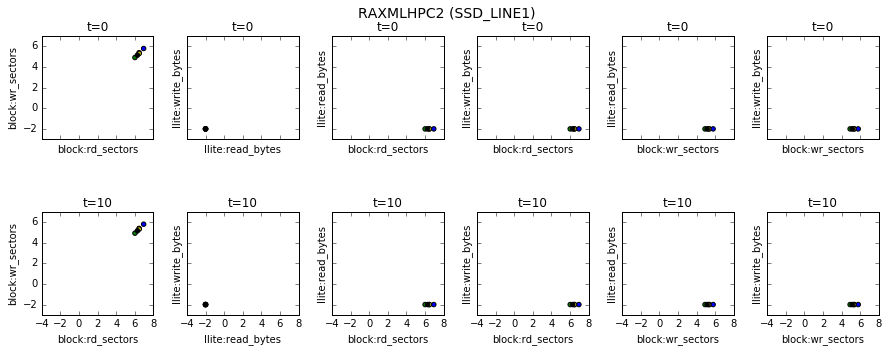

In [5]:
from numpy import inf

df2 = pd.read_pickle('clean_merged.pkl')

def fix_inf(x):
    np.place(x, x==-inf, -2)
    return x


# df = df[df['Nodes']==1]
io_columns = [
#         'nfs:normal_read', 'nfs:normal_write',
        'block:rd_sectors','block:wr_sectors', 
        'llite:read_bytes', 'llite:write_bytes'
        ]
df = df2[io_columns + ['JobID']].dropna()

jobs = ['698482','708683','954139','703429','912682']
# df = df[df['JobID'].isin(['698482','708683','954139','703429','912682'])]
df = df.loc[jobs,:]

#Get 1D array of log10 values
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.sum(x, axis=0))
    df[io] = df[io].apply(lambda x: np.log10(x))
    df[io] = df[io].apply(fix_inf)
#Highest time
max_time = df[io].apply(lambda x: len(x)).max()
#Add NaN
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.concatenate((x, [np.nan]*(max_time-len(x)))))

relationships = [
['block:rd_sectors','block:wr_sectors'], ['llite:read_bytes','llite:write_bytes'], \
['block:rd_sectors', 'llite:read_bytes'], ['block:rd_sectors', 'llite:write_bytes'], \
['block:wr_sectors','llite:read_bytes'], \
['block:wr_sectors', 'llite:write_bytes']
]


max_time = 2 #First 30 min

f, axarr = plt.subplots(max_time, len(relationships), sharex=True, sharey=True)
f.suptitle('RAXMLHPC2 (SSD_LINE1)', fontsize=14)
f.set_size_inches(15,5)
f.subplots_adjust(wspace=0.3, hspace=0.7)
# f.tight_layout()
for c, relation in enumerate(relationships):
    for r in range(max_time):
        t = r*10
        x = df[relation[0]].apply(lambda x: x[r])
        y = df[relation[1]].apply(lambda x: x[r])
        axarr[r,c].set_title('t='+str(t))
        axarr[r,c].set_xlabel(relation[0])
        axarr[r,c].set_ylabel(relation[1])
        axarr[r,c].scatter(x,y, c=['r','g','b','y','k'])

####Analysis
- The I/O rate seems too high (Gigabytes in 10 min period) to be an OS process.
- Hence, we are not sure why SSD_LINE1 was formed.
- It could be anything other than what the job is doing as CIPRES and NSG are NFS based.

/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/IPython/kernel/__main__.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


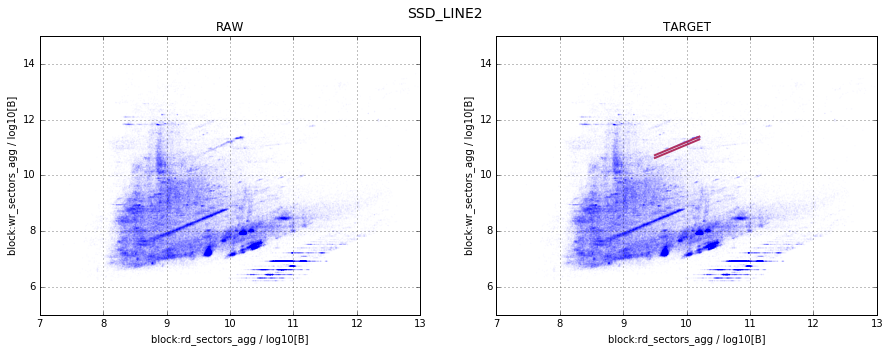

In [6]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

plt.figure(figsize=(15,5))
plt.suptitle('SSD_LINE2', fontsize=14)

plt.subplot(1,2,1)

ndf_x = ndf['block:rd_sectors_agg']
ndf_y = ndf['block:wr_sectors_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([7,13])
plt.xlabel('block:rd_sectors_agg / log10[B]')
plt.ylabel('block:wr_sectors_agg / log10[B]')
plt.title('RAW')
plt.grid();

plt.subplot(1,2,2)

ndf_x = ndf['block:rd_sectors_agg']
ndf_y = ndf['block:wr_sectors_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([7,13])
plt.xlabel('block:rd_sectors_agg / log10[B]')
plt.ylabel('block:wr_sectors_agg / log10[B]')
plt.title('TARGET');

x = np.linspace(9.5,10.2,10)
y1 = (0.95*x)+1.7
y2 = (0.95*x)+1.6
plt.plot(x, y1, '#b03060', linewidth=2)
plt.plot(x, y2, '#b03060', linewidth=2)
plt.grid();

cond1 = ndf['block:wr_sectors_agg']<(0.95*ndf['block:rd_sectors_agg'])+1.7
cond2 = ndf['block:wr_sectors_agg']>(0.95*ndf['block:rd_sectors_agg'])+1.6
cond3 = ndf['block:rd_sectors_agg']<10
cond4 = ndf['block:rd_sectors_agg']>9.5

#Getting JobNames
mega_df = pd.read_pickle('clean_merged.pkl') #For project ID
mega_df = mega_df[['JobID','Project']]
mega_df['JobID'] = mega_df['JobID'].astype(int)
meta_df = ndf[cond1&cond2&cond3&cond4]  #For jobs on line
meta_df['JobID'] = meta_df.index
meta_df = meta_df[['JobID']]
dfj = pd.read_fwf('jobs.txt', names=['JobID','JobName']) #For job names
meta_df['JobID'] = meta_df['JobID'].astype(int)
dfj['JobID'] = dfj['JobID'].astype(int) 
meta_df = meta_df.merge(dfj)
name = mega_df.merge(meta_df)
name.to_html('ssd_line2.html')

####Composition
            Count  Percentage
    csd404    208   82.213439
    csd275     11    4.347826
    uic151      6    2.371542
    slc116      4    1.581028
    bcm103      4    1.581028

####Analysis
- Most jobs are named "Word Count:" from project csd404. Bioinformatics.

/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/IPython/kernel/__main__.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


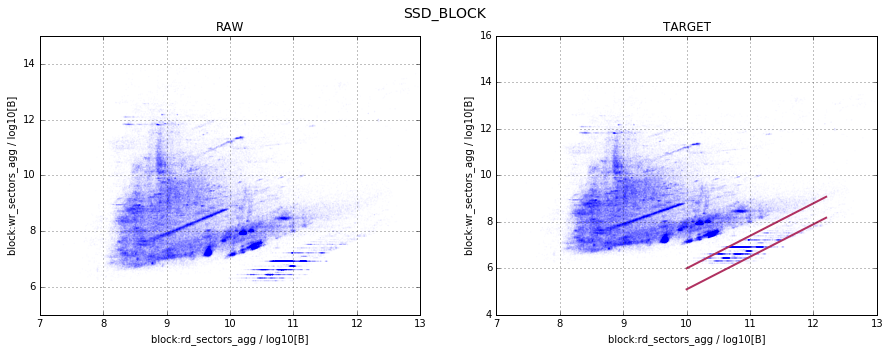

In [7]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

plt.figure(figsize=(15,5))
plt.suptitle('SSD_BLOCK', fontsize=14)

plt.subplot(1,2,1)

ndf_x = ndf['block:rd_sectors_agg']
ndf_y = ndf['block:wr_sectors_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([7,13])
plt.xlabel('block:rd_sectors_agg / log10[B]')
plt.ylabel('block:wr_sectors_agg / log10[B]')
plt.title('RAW')
plt.grid();

plt.subplot(1,2,2)

ndf_x = ndf['block:rd_sectors_agg']
ndf_y = ndf['block:wr_sectors_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([7,13])
plt.xlabel('block:rd_sectors_agg / log10[B]')
plt.ylabel('block:wr_sectors_agg / log10[B]')
plt.title('TARGET');

x = np.linspace(10,12.2,10)
y1 = (1.4*x)-8.0
y2 = (1.4*x)-8.9
plt.plot(x, y1, '#b03060', linewidth=2)
plt.plot(x, y2, '#b03060', linewidth=2)
plt.grid();

cond1 = ndf['block:wr_sectors_agg']<(1.4*ndf['block:rd_sectors_agg'])-8.0
cond2 = ndf['block:wr_sectors_agg']>(1.4*ndf['block:rd_sectors_agg'])-8.9
cond3 = ndf['block:wr_sectors_agg']<8
cond4 = ndf['block:wr_sectors_agg']>6.2

#Getting JobNames
mega_df = pd.read_pickle('clean_merged.pkl') #For project ID
mega_df = mega_df[['JobID','Project']]
mega_df['JobID'] = mega_df['JobID'].astype(int)
meta_df = ndf[cond1&cond2&cond3&cond4]  #For jobs on line
meta_df['JobID'] = meta_df.index
meta_df = meta_df[['JobID']]
dfj = pd.read_fwf('jobs.txt', names=['JobID','JobName']) #For job names
meta_df['JobID'] = meta_df['JobID'].astype(int)
dfj['JobID'] = dfj['JobID'].astype(int) 
meta_df = meta_df.merge(dfj)
name = mega_df.merge(meta_df)
name.to_html('ssd_block.html')

####Composition
            Count  Percentage
    orn106   1798   24.525986
    sds121   1030   14.049925
    crl231    464    6.329287
    rpi112    406    5.538126
    slc215    371    5.060701

####Analysis
- Combination of RXML along with other types of jobs (unsure)

/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/IPython/kernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


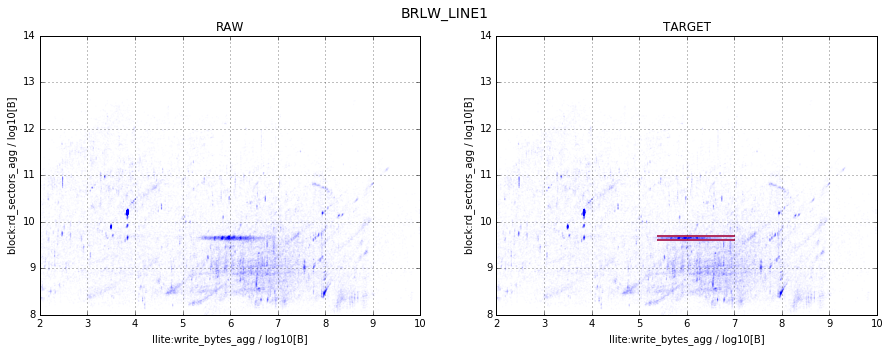

In [8]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

plt.figure(figsize=(15,5))
plt.suptitle('BRLW_LINE1', fontsize=14)

plt.subplot(1,2,1)

ndf_y = ndf['block:rd_sectors_agg']
ndf_x = ndf['llite:write_bytes_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([2,10])
plt.ylim([8,14])
plt.ylabel('block:rd_sectors_agg / log10[B]')
plt.xlabel('llite:write_bytes_agg / log10[B]')
plt.title('RAW')
plt.grid();

plt.subplot(1,2,2)

ndf_y = ndf['block:rd_sectors_agg']
ndf_x = ndf['llite:write_bytes_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([2,10])
plt.ylim([8,14])
plt.ylabel('block:rd_sectors_agg / log10[B]')
plt.xlabel('llite:write_bytes_agg / log10[B]')
plt.title('TARGET');

x = np.linspace(5.4,7,10)
y1 = (0.0*x)+9.7
y2 = (0.0*x)+9.6
plt.plot(x, y1, '#b03060', linewidth=2)
plt.plot(x, y2, '#b03060', linewidth=2)
plt.grid();

cond1 = ndf['block:rd_sectors_agg']<9.7
cond2 = ndf['block:rd_sectors_agg']>9.6
cond3 = ndf['llite:write_bytes_agg']<7
cond4 = ndf['llite:write_bytes_agg']>5.4

#Getting JobNames
mega_df = pd.read_pickle('clean_merged.pkl') #For project ID
mega_df = mega_df[['JobID','Project']]
mega_df['JobID'] = mega_df['JobID'].astype(int)
meta_df = ndf[cond1&cond2&cond3&cond4]  #For jobs on line
meta_df['JobID'] = meta_df.index
meta_df = meta_df[['JobID']]
dfj = pd.read_fwf('jobs.txt', names=['JobID','JobName']) #For job names
meta_df['JobID'] = meta_df['JobID'].astype(int)
dfj['JobID'] = dfj['JobID'].astype(int) 
meta_df = meta_df.merge(dfj)
name = mega_df.merge(meta_df)
name.to_html('brlw_line1.html')

####Composition
            Count  Percentage
    csd436    232   28.121212
    kan203    134   16.242424
    sub101     51    6.181818
    csb109     37    4.484848
    slc215     27    3.272727

####Analysis
- Plenty of material science and chemistry jobs from NAMD and VASP. 

/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/IPython/kernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


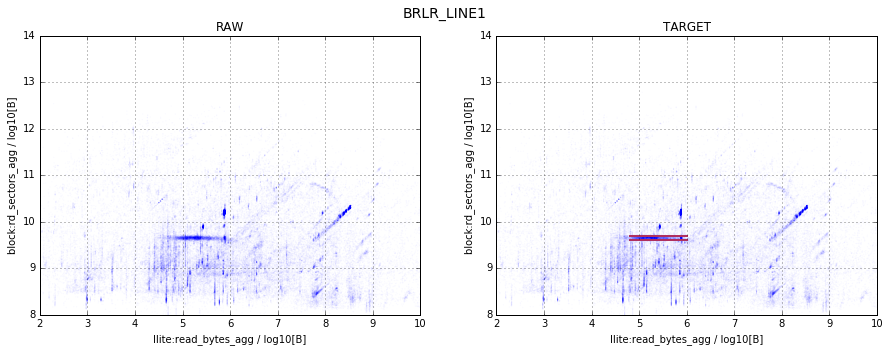

In [9]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

plt.figure(figsize=(15,5))
plt.suptitle('BRLR_LINE1', fontsize=14)

plt.subplot(1,2,1)

ndf_y = ndf['block:rd_sectors_agg']
ndf_x = ndf['llite:read_bytes_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([2,10])
plt.ylim([8,14])
plt.ylabel('block:rd_sectors_agg / log10[B]')
plt.xlabel('llite:read_bytes_agg / log10[B]')
plt.title('RAW')
plt.grid();

plt.subplot(1,2,2)

ndf_y = ndf['block:rd_sectors_agg']
ndf_x = ndf['llite:read_bytes_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([2,10])
plt.ylim([8,14])
plt.ylabel('block:rd_sectors_agg / log10[B]')
plt.xlabel('llite:read_bytes_agg / log10[B]')
plt.title('TARGET');

x = np.linspace(4.8,6,10)
y1 = (0.0*x)+9.7
y2 = (0.0*x)+9.6
plt.plot(x, y1, '#b03060', linewidth=2)
plt.plot(x, y2, '#b03060', linewidth=2)
plt.grid();

cond1 = ndf['block:rd_sectors_agg']<9.7
cond2 = ndf['block:rd_sectors_agg']>9.6
cond3 = ndf['llite:write_bytes_agg']>4.8
cond4 = ndf['llite:write_bytes_agg']<6

#Getting JobNames
mega_df = pd.read_pickle('clean_merged.pkl') #For project ID
mega_df = mega_df[['JobID','Project']]
mega_df['JobID'] = mega_df['JobID'].astype(int)
meta_df = ndf[cond1&cond2&cond3&cond4]  #For jobs on line
meta_df['JobID'] = meta_df.index
meta_df = meta_df[['JobID']]
dfj = pd.read_fwf('jobs.txt', names=['JobID','JobName']) #For job names
meta_df['JobID'] = meta_df['JobID'].astype(int)
dfj['JobID'] = dfj['JobID'].astype(int) 
meta_df = meta_df.merge(dfj)
name = mega_df.merge(meta_df)
name.to_html('brlr_line1.html')

####Composition
            Count  Percentage
    csd436    166   38.248848
    sub101     48   11.059908
    rpi112     43    9.907834
    kan203     15    3.456221
    csb109     13    2.995392

####Analysis
- Trends similar to BRLW_LINE1
- Plenty of material science and chemistry jobs from NAMD and VASP. 
- Lots of "FW_job:" from csd 436. (VASP)

/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/IPython/kernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


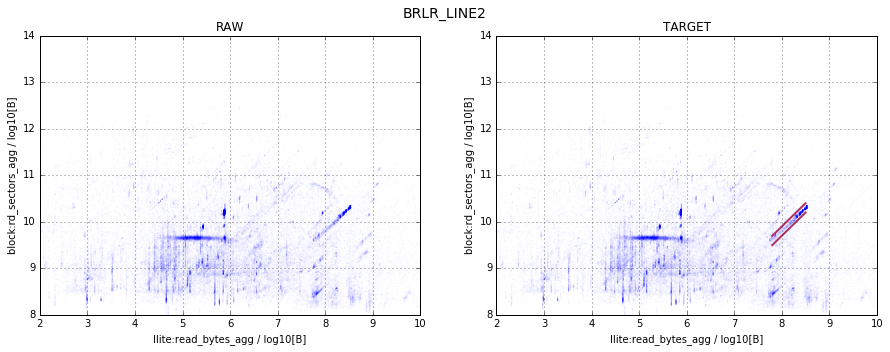

In [10]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

plt.figure(figsize=(15,5))
plt.suptitle('BRLR_LINE2', fontsize=14)

plt.subplot(1,2,1)

ndf_y = ndf['block:rd_sectors_agg']
ndf_x = ndf['llite:read_bytes_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([2,10])
plt.ylim([8,14])
plt.ylabel('block:rd_sectors_agg / log10[B]')
plt.xlabel('llite:read_bytes_agg / log10[B]')
plt.title('RAW')
plt.grid();

plt.subplot(1,2,2)

ndf_y = ndf['block:rd_sectors_agg']
ndf_x = ndf['llite:read_bytes_agg']
plt.scatter(ndf_x, ndf_y, alpha=0.02, marker='o', edgecolors='none', s=2)
plt.xlim([2,10])
plt.ylim([8,14])
plt.ylabel('block:rd_sectors_agg / log10[B]')
plt.xlabel('llite:read_bytes_agg / log10[B]')
plt.title('TARGET');

x = np.linspace(7.8,8.5,10)
y1 = (1.0*x)+1.9
y2 = (1.0*x)+1.7
plt.plot(x, y1, '#b03060', linewidth=2)
plt.plot(x, y2, '#b03060', linewidth=2)
plt.grid();

cond1 = ndf['block:rd_sectors_agg']<(1.0*ndf['llite:read_bytes_agg'])+1.9
cond2 = ndf['block:rd_sectors_agg']>(1.0*ndf['llite:read_bytes_agg'])+1.7
cond3 = ndf['llite:read_bytes_agg']>7.8
cond4 = ndf['llite:read_bytes_agg']<8.5

#Getting JobNames
mega_df = pd.read_pickle('clean_merged.pkl') #For project ID
mega_df = mega_df[['JobID','Project']]
mega_df['JobID'] = mega_df['JobID'].astype(int)
meta_df = ndf[cond1&cond2&cond3&cond4]  #For jobs on line
meta_df['JobID'] = meta_df.index
meta_df = meta_df[['JobID']]
dfj = pd.read_fwf('jobs.txt', names=['JobID','JobName']) #For job names
meta_df['JobID'] = meta_df['JobID'].astype(int)
dfj['JobID'] = dfj['JobID'].astype(int) 
meta_df = meta_df.merge(dfj)
name = mega_df.merge(meta_df)
name.to_html('brlr_line2.html')

####Composition
            Count  Percentage
    csd404   2500   94.197438
    cla221     58    2.185381
    soc110     11    0.414469
    ptn109      9    0.339111
    ddp195      9    0.339111

####Analysis
- Trend similar to SSD_LINE2.
- Most jobs are named "Word Count:" from project csd404. Bioinfomrmatics codes.

#Further Analysis of Spots (k-means Clustering) 

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

k-means is carried out using the sklearn implementation.[1] 

####Reference:
[1] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

####Cluster Summary:
- Total Jobs:     242249
- Total Users:    841
- Number of clusters:     13 

|ID    |  Jobs          |  Users
| :- | :-------------: | :-:
|0     |  235195 (97.09%)| 838 (99.64%)
|1    |   1 (0.00%)    |   1 (0.12%)
|2     |  220 (0.09%)    | 8 (0.95%)
|3     |  37 (0.02%)     | 6 (0.71%)
|4     |  283 (0.12%)    | 58 (6.90%)
|5      | 933 (0.39%)    | 145 (17.24%)
|6      | 4 (0.00%)      | 3 (0.36%)
|7      | 20 (0.01%)     | 3 (0.36%)
|8      | 26 (0.01%)     | 4 (0.48%)
|9      | 1 (0.00%)      | 1 (0.12%)
|10     | 340 (0.14%)    | 16 (1.90%)
|11     | 5045 (2.08%)   | 357 (42.45%)
|12     | 144 (0.06%)    | 18 (2.14%)
# 
####Plotting parameters:
- Units : log_10[B]
- Conveted log_10[0] to -2 

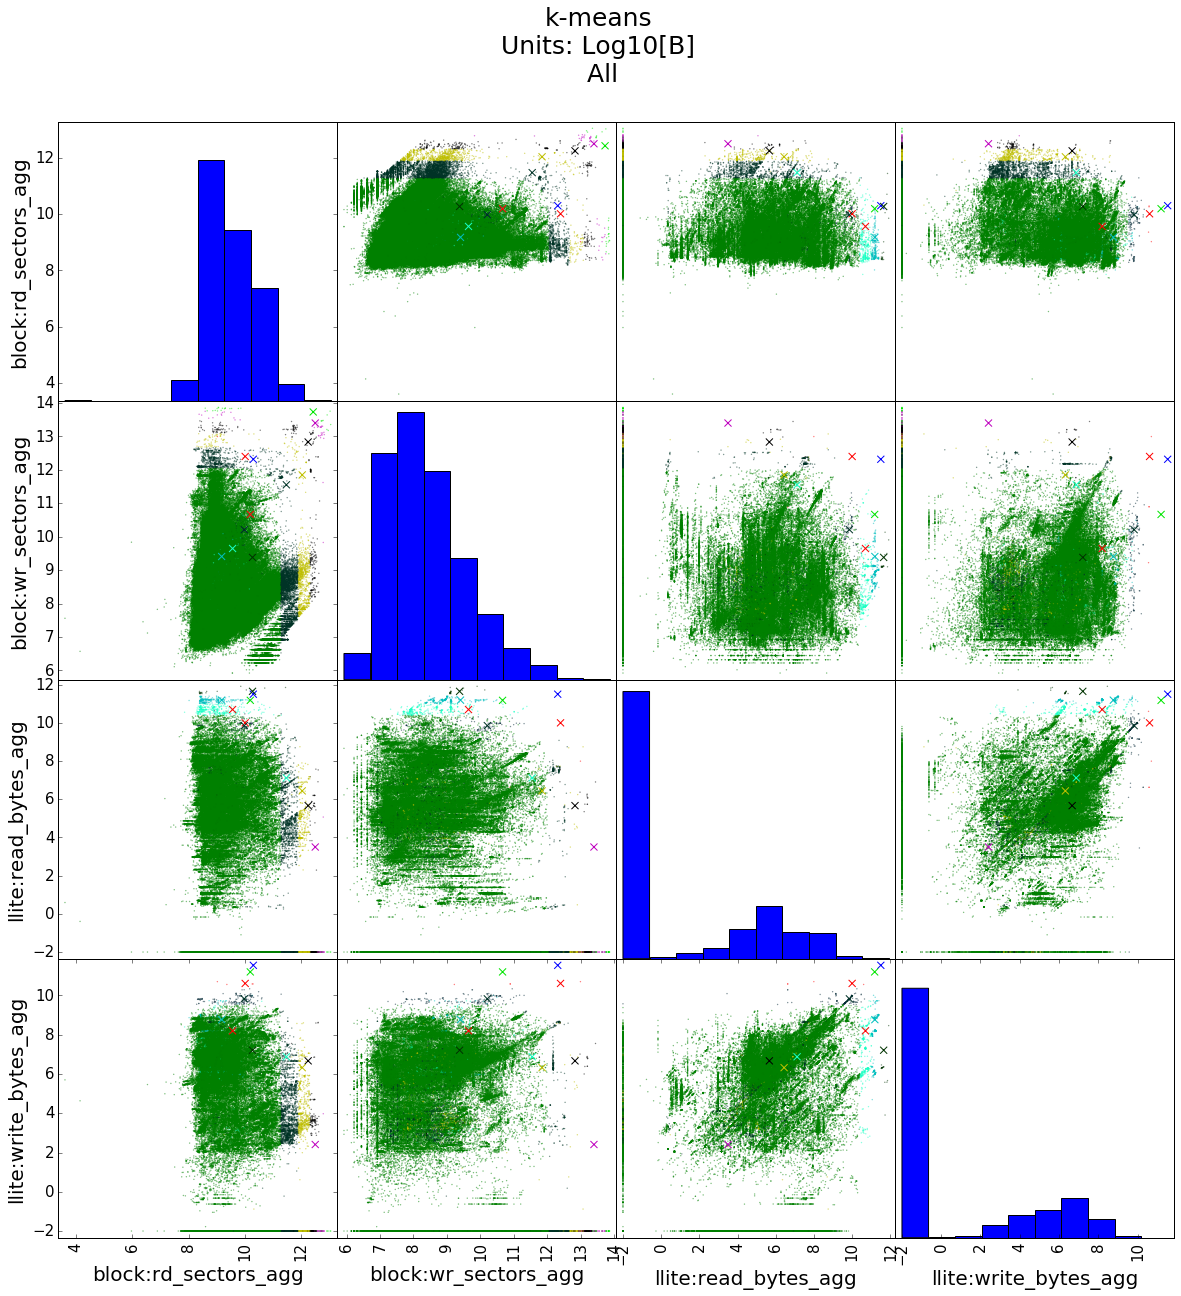

In [11]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df2 = pd.read_csv('Clean_NFS_kmeans/clusterID.csv.gz', compression='gzip')
df_center = pd.read_pickle('Clean_NFS_kmeans/centers.pkl')

df3['JobID'] = df3['JobID'].astype('int')
df3 = df3.drop('UserID', axis=1)
df2['JobID'] = df2['JobID'].astype('int')
df2 = df2.drop('UserID', axis=1)
df = df3.merge(df2, how='inner', on='JobID')
ndf = df.drop(['Time','JobID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf[ndf.columns[0:-1]] = np.log10(ndf[ndf.columns[0:-1]])
ndf = ndf.replace([np.inf, -np.inf], -2)

colors={
       0:'g', #freakishly huge cluster... 97% of jobs
       1:'b',
       2:'c',
       3:'m',
       4:'k',
       5:'y',
       6:'r',
       7:'#003300',
       8:'#00e600',
       9:'r',
       10:'#1affc6',
       11:'#003326',
       12:'#002633'
       }

ndf['Clusters'] = ndf['Clusters'].apply(lambda x: colors[x])
axl = scatter_matrix(ndf, alpha=0.5, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2, c=ndf['Clusters']);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        if i != j:  # only the scatter plots
            x = np.log10(df_center[ndf.columns[j]])
            y = np.log10(df_center[ndf.columns[i]])
            ax.scatter(x,y, s=50, marker='x', c=colors.values())

plt.suptitle('k-means\nUnits: Log10[B]\n All', fontsize=25);

####Analysis:
- It seems the cluster 0 (green) captures most of the linear trends. We have analyzed the linear trends in our "no cluster" section. 
- Cluster 0 also makes it difficult to visualize the other clusters and hence can be made transparent.

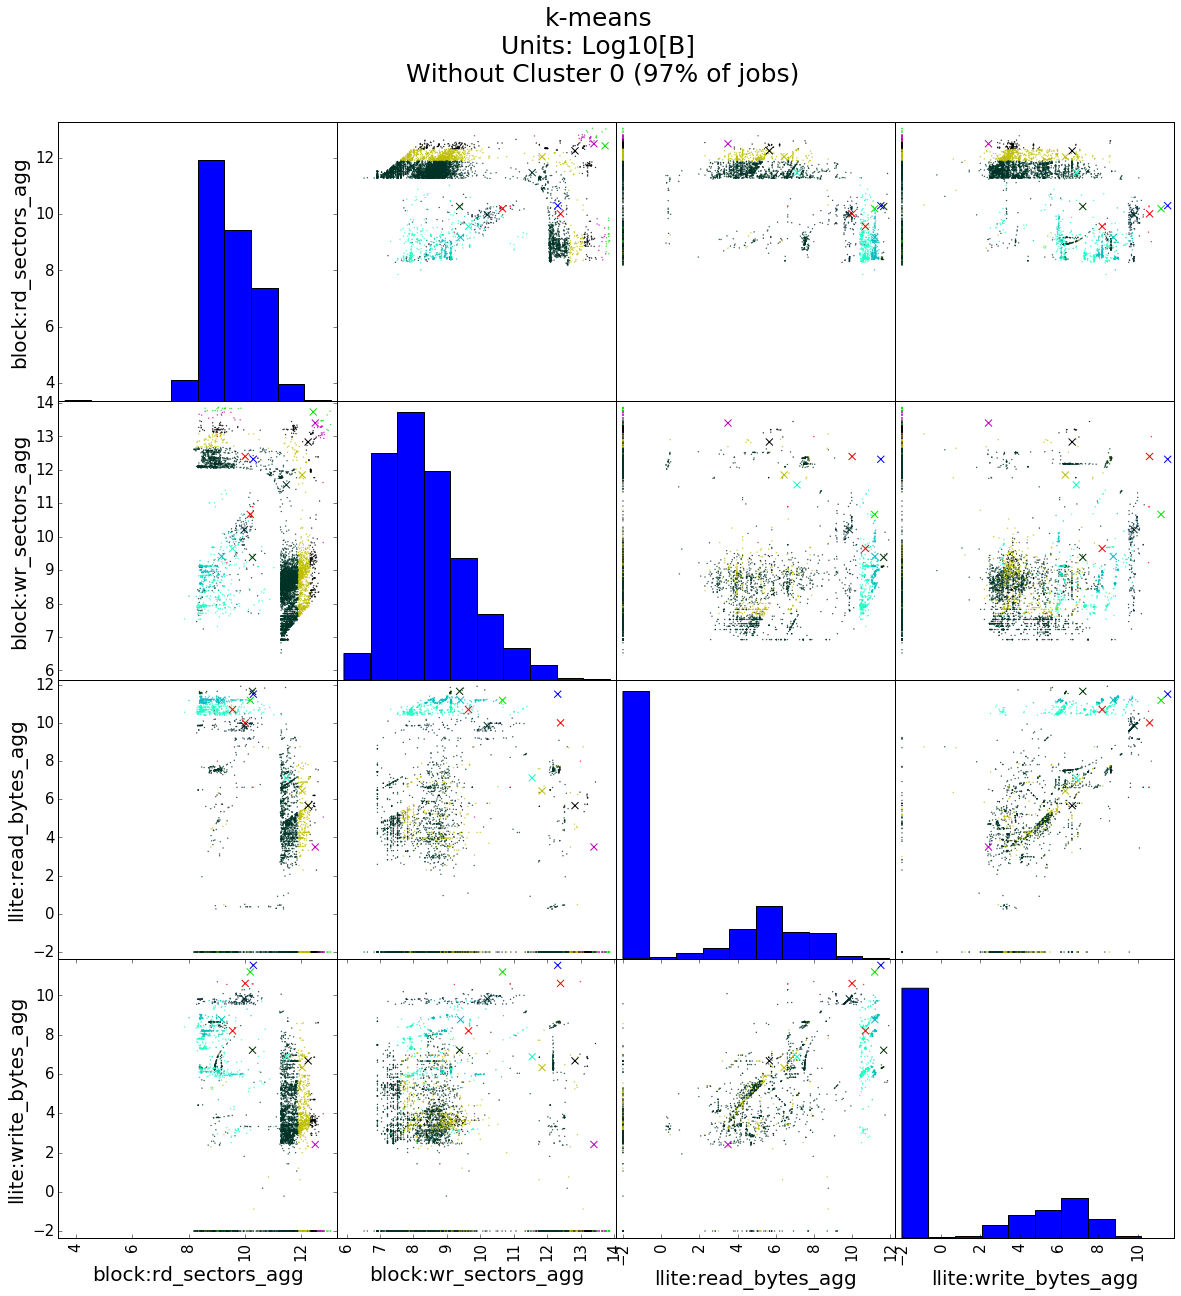

In [12]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df2 = pd.read_csv('Clean_NFS_kmeans/clusterID.csv.gz', compression='gzip')
df_center = pd.read_pickle('Clean_NFS_kmeans/centers.pkl')

df3['JobID'] = df3['JobID'].astype('int')
df3 = df3.drop('UserID', axis=1)
df2['JobID'] = df2['JobID'].astype('int')
df2 = df2.drop('UserID', axis=1)
df = df3.merge(df2, how='inner', on='JobID')
ndf = df.drop(['Time','JobID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf[ndf.columns[0:-1]] = np.log10(ndf[ndf.columns[0:-1]])
ndf = ndf.replace([np.inf, -np.inf], -2)

colors={
       0:'None', #freakishly huge cluster... 97% of jobs
       1:'b',
       2:'c',
       3:'m',
       4:'k',
       5:'y',
       6:'r',
       7:'#003300',
       8:'#00e600',
       9:'r',
       10:'#1affc6',
       11:'#003326',
       12:'#002633'
       }

ndf['Clusters'] = ndf['Clusters'].apply(lambda x: colors[x])
axl = scatter_matrix(ndf, alpha=0.8, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2, c=ndf['Clusters']);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        if i != j:  # only the scatter plots
            x = np.log10(df_center[ndf.columns[j]])
            y = np.log10(df_center[ndf.columns[i]])
            ax.scatter(x,y, s=50, marker='x', c=colors.values())

plt.suptitle('k-means\nUnits: Log10[B]\n Without Cluster 0 (97% of jobs)', fontsize=25);

####Analysis:
- We can see the distinct deep green and yellow clusters forming outter rings on block read and write. This means that the 2 clusters either have a high block read, a high block write, or both (in the terrabyte range). Green cluster has block read/write values of >10 GB while yellow cluster has block read/write values of >1 TB. Both these clusters also display linear trend on lustre read vs lustre write (10 kB - 1 Mb). 
- The blusish green and dark blue clusters are forming on lower block read vs block write plots (100 MB - 1 GB). However, this cluster shows very high lustre read (>10 GB) and variable lustre write (100 kB - 1 GB)
- Any outlier (small clusters) are hard to see and hence all the larger clusters will be made transparent on the next plot.


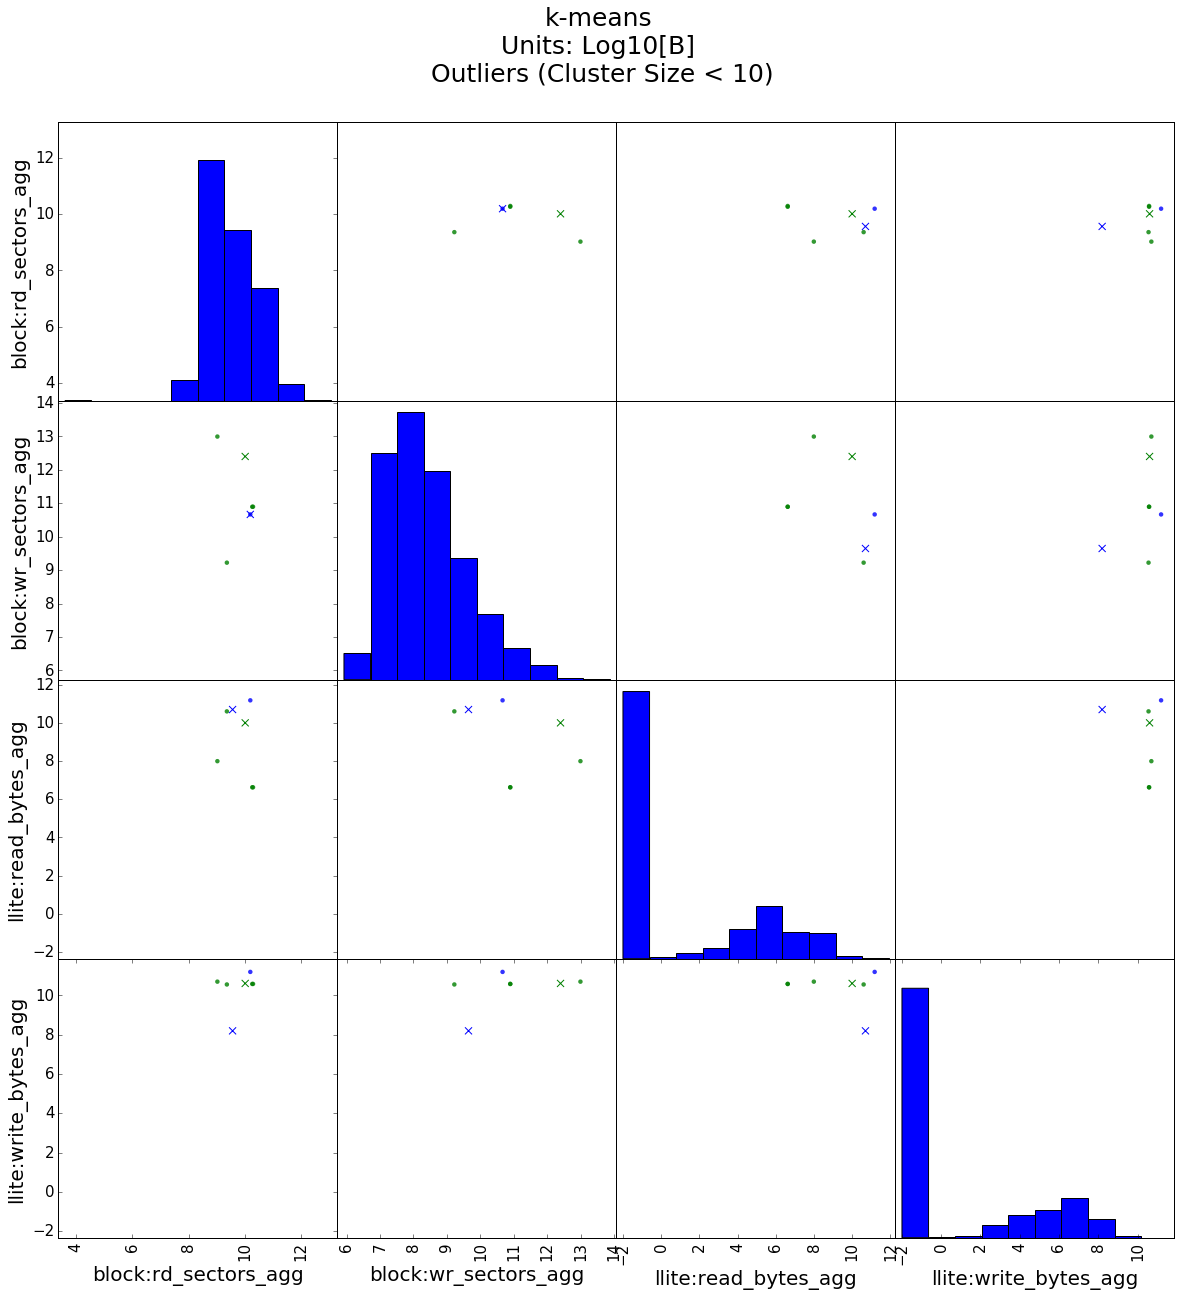

In [13]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df2 = pd.read_csv('Clean_NFS_kmeans/clusterID.csv.gz', compression='gzip')
df_center = pd.read_pickle('Clean_NFS_kmeans/centers.pkl')

df3['JobID'] = df3['JobID'].astype('int')
df3 = df3.drop('UserID', axis=1)
df2['JobID'] = df2['JobID'].astype('int')
df2 = df2.drop('UserID', axis=1)
df = df3.merge(df2, how='inner', on='JobID')
ndf = df.drop(['Time','JobID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf[ndf.columns[0:-1]] = np.log10(ndf[ndf.columns[0:-1]])
ndf = ndf.replace([np.inf, -np.inf], -2)

colors={
       0:'None', #freakishly huge cluster... 97% of jobs
       1:'None',
       2:'None',
       3:'None',
       4:'None',
       5:'None',
       6:'g',
       7:'None',
       8:'None',
       9:'b',
       10:'None',
       11:'None',
       12:'None'
       }

ndf['Clusters'] = ndf['Clusters'].apply(lambda x: colors[x])
axl = scatter_matrix(ndf, alpha=0.8, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=20, c=ndf['Clusters']);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        if i != j:  # only the scatter plots
            x = np.log10(df_center[ndf.columns[j]])
            y = np.log10(df_center[ndf.columns[i]])
            ax.scatter(x,y, s=50, marker='x', c=colors.values())

plt.suptitle('k-means\nUnits: Log10[B]\n Outliers (Cluster Size < 10)', fontsize=25);

|ID    |  Jobs          |  Users |  Color
| :- | :-------------: | :-: |  :-:
|6   | 4 (0.00%)      | 3 (0.36%) |  Green
|9      | 1 (0.00%)      | 1 (0.12%) | Blue

####Analysis:
- All 5 outlier jobs have high I/O usage compared to other jobs.
- Cluster 9 is has higher I/O usage than Cluster 6 in all aspects except Lustre write.
# 

In [14]:
df_center = pd.read_pickle('Clean_NFS_kmeans/centers.pkl')
df_center

block:rd_sectors_agg  block:wr_sectors_agg  llite:read_bytes_agg  \
Clusters                                                                     
0                 1.409125e+10          1.375983e+10          5.700689e+07   
1                 2.001491e+10          2.060209e+12          3.122349e+11   
2                 1.501909e+09          2.554771e+09          1.522869e+11   
3                 3.173258e+12          2.492282e+13          3.134270e+03   
4                 1.776763e+12          6.761042e+12          4.591754e+05   
5                 1.092973e+12          7.017751e+11          2.711788e+06   
6                 1.029539e+10          2.499096e+12          9.872771e+09   
7                 1.873444e+10          2.400076e+09          4.406462e+11   
8                 2.687317e+12          5.356723e+13          0.000000e+00   
9                 1.562564e+10          4.622596e+10          1.489519e+11   
10                3.669027e+09          4.434200e+09          4.911900e+10   
11                2.988061e+11          3.551858e+11          1.296575e+07   
12                9.566315e+09          1.618631e+10          7.076143e+09   

          llite:write_bytes_agg  
Clusters                         
0                  1.358858e+07  
1                  3.443261e+11  
2                  5.867700e+08  
3                  2.559459e+02  
4                  4.685488e+06  
5                  2.108279e+06  
6                  4.116987e+10  
7                  1.628843e+07  
8                  0.000000e+00  
9                  1.589071e+11  
10                 1.579761e+08  
11                 7.552298e+06  
12                 6.742699e+09

####Cluster 5 Composition
            Count  Percentage
    slc215     56   12.068966
    uic285     49   10.560345
    mia157     25    5.387931
    mit131     24    5.172414
    get108     21    4.525862

####Cluster 10 Composition
            Count  Percentage
    cit121    106   33.333333
    uic236     77   24.213836
    cmu101     51   16.037736
    ucr113     26    8.176101
    mia157     19    5.974843

####Cluster 11 Composition
            Count  Percentage
    slc215    173    7.614437
    csb109    167    7.350352
    slc116    110    4.841549
    sds121    100    4.401408
    uic151     74    3.257042

####Analysis of Job Names
- Cluster 5 (unsure)
- Cluster 10 seems to show chemistry codes 
- Cluster 11 (unsure)

#Further Analysis of Spots (DBSCAN Clustering) 
Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature. In 2014, the algorithm was awarded the test of time award (an award given to algorithms which have received substantial attention in theory and practice) at the leading data mining conference, KDD.

A custom made DBSCAN algorithm was used. [1] [2]

####Reference

[1] Ester, M., Kriegel, H.-P., Sander, J. and Xu, X., "A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise". In: Proceedings of the Second International Conference on Knowledge Discovery and Data Mining (KDD-96), pp. 226–231. 1996

[2] Kriegel, H.-P., Kroeger, P., Sander, J. and Zimek, A., "Density-based Clustering". In: WIREs Data Mining and Knowledge Discovery, 1, 3, pp. 231–240. 2011


####Cluster Summary:
- Min Points: 150
- Epsilon: 0.000300
- Total Jobs:     242249
- Total Users:    841
- Number of clusters:     14


|ID    |  Jobs          |  Users
| :- | :-------------: | :-:
|0 |      2219 (0.92%) |   128 (15.22%)
|1  |     114470 (47.25%)| 722 (85.85%)
|2  |     6630 (2.74%)|    310 (36.86%)
|3  |     4637 (1.91%) |   244 (29.01%)
|4  |     1062 (0.44%) |   111 (13.20%)
|5  |     414 (0.17%)  |   59 (7.02%)
|6  |     352 (0.15%)  |   95 (11.30%)
|7  |     451 (0.19%)  |   71 (8.44%)
|8  |     295 (0.12%)  |   60 (7.13%)
|9  |     277 (0.11%)  |   50 (5.95%)
|10 |     267 (0.11%)  |   64 (7.61%)
|11 |     242 (0.10%)  |   56 (6.66%)
|12 |     159 (0.07%)  |   27 (3.21%)
|-1 |     110774 (45.73%)| 762 (90.61%)

- ** Cluster -1 is noise **

# 
####Plotting parameters:
- Units : log_10[B]
- Conveted log_10[0] to -2 

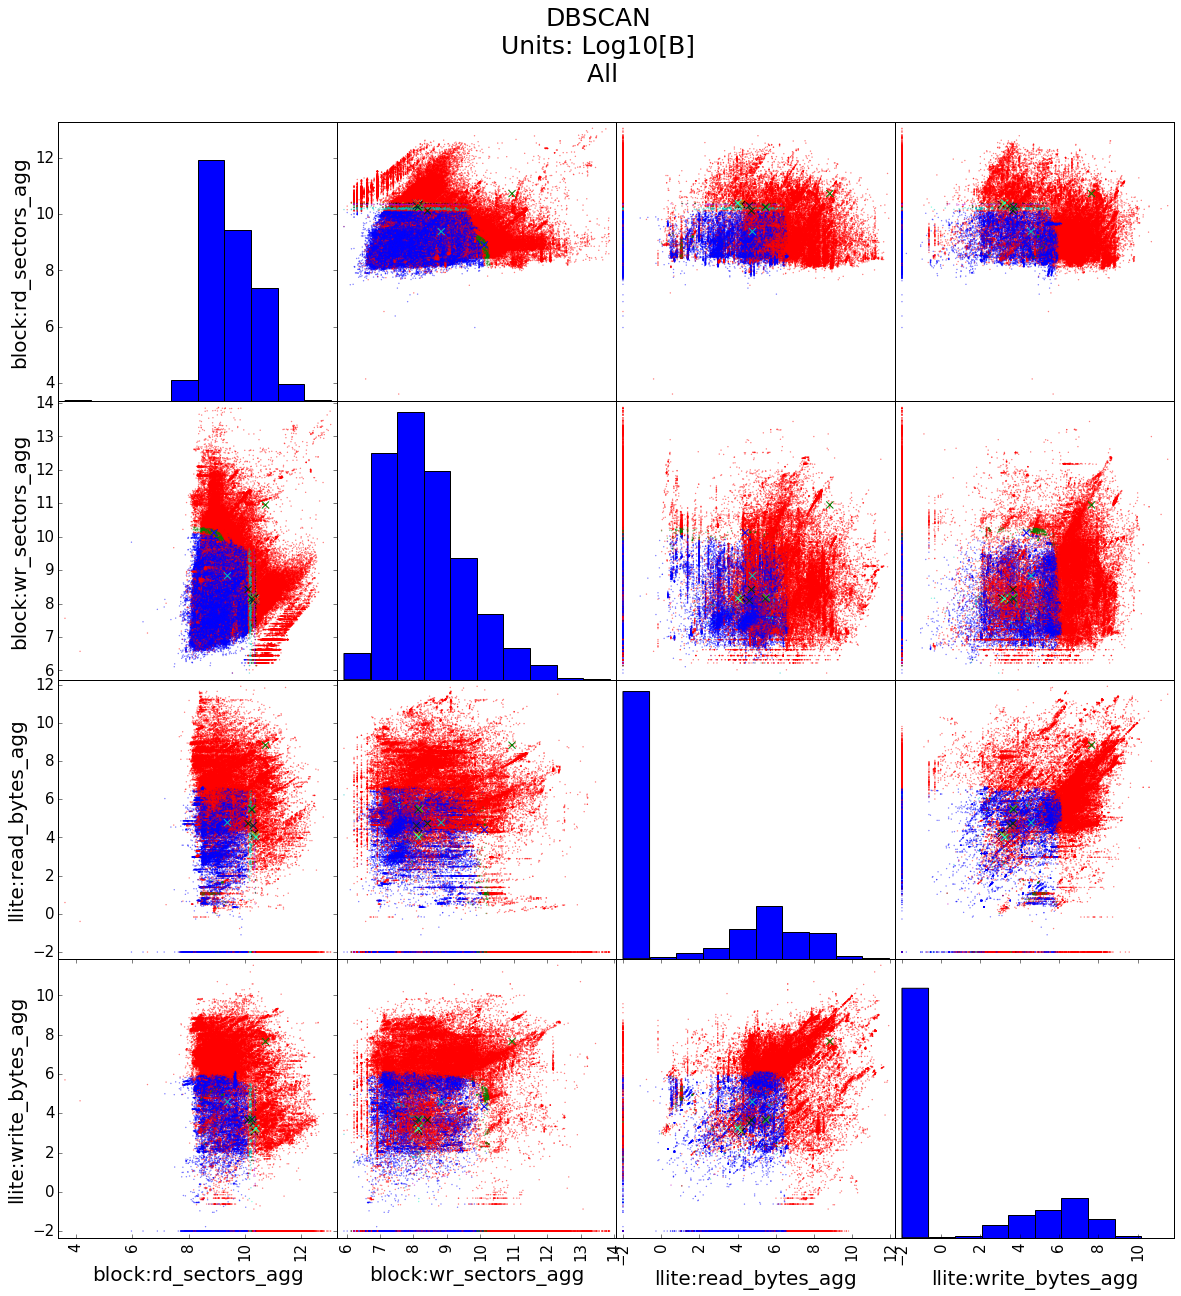

In [15]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df2 = pd.read_csv('Clean_NFS_150/clusterID.csv.gz', compression='gzip')
df_center = pd.read_pickle('Clean_NFS_150/centers.pkl')

df3['JobID'] = df3['JobID'].astype('int')
df3 = df3.drop('UserID', axis=1)
df2['JobID'] = df2['JobID'].astype('int')
df2 = df2.drop('UserID', axis=1)
df = df3.merge(df2, how='inner', on='JobID')
ndf = df.drop(['Time','JobID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf[ndf.columns[0:-1]] = np.log10(ndf[ndf.columns[0:-1]])
ndf = ndf.replace([np.inf, -np.inf], -2)

colors={
       0:'g', 
       1:'b',
       2:'c',
       3:'m',
       4:'k',
       5:'y',
       6:'#b80934',
       7:'#003300',
       8:'#00e600',
       9:'#666633',
       10:'#1affc6',
       11:'#003326',
       12:'#002633',
       -1:'r'
       }

ndf['Clusters'] = ndf['Clusters'].apply(lambda x: colors[x])
axl = scatter_matrix(ndf, alpha=0.5, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2, c=ndf['Clusters']);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        if i != j:  # only the scatter plots
            x = np.log10(df_center[ndf.columns[j]])
            y = np.log10(df_center[ndf.columns[i]])
            ax.scatter(x,y, s=50, marker='x', c=colors.values())

plt.suptitle('DBSCAN\nUnits: Log10[B]\n All', fontsize=25);

####Analysis:
- The red "noise" region (cluster -1) makes it difficult to see anything beyond cluster 1 (blue).
- Before we throw away the "noise", let's analyze it.

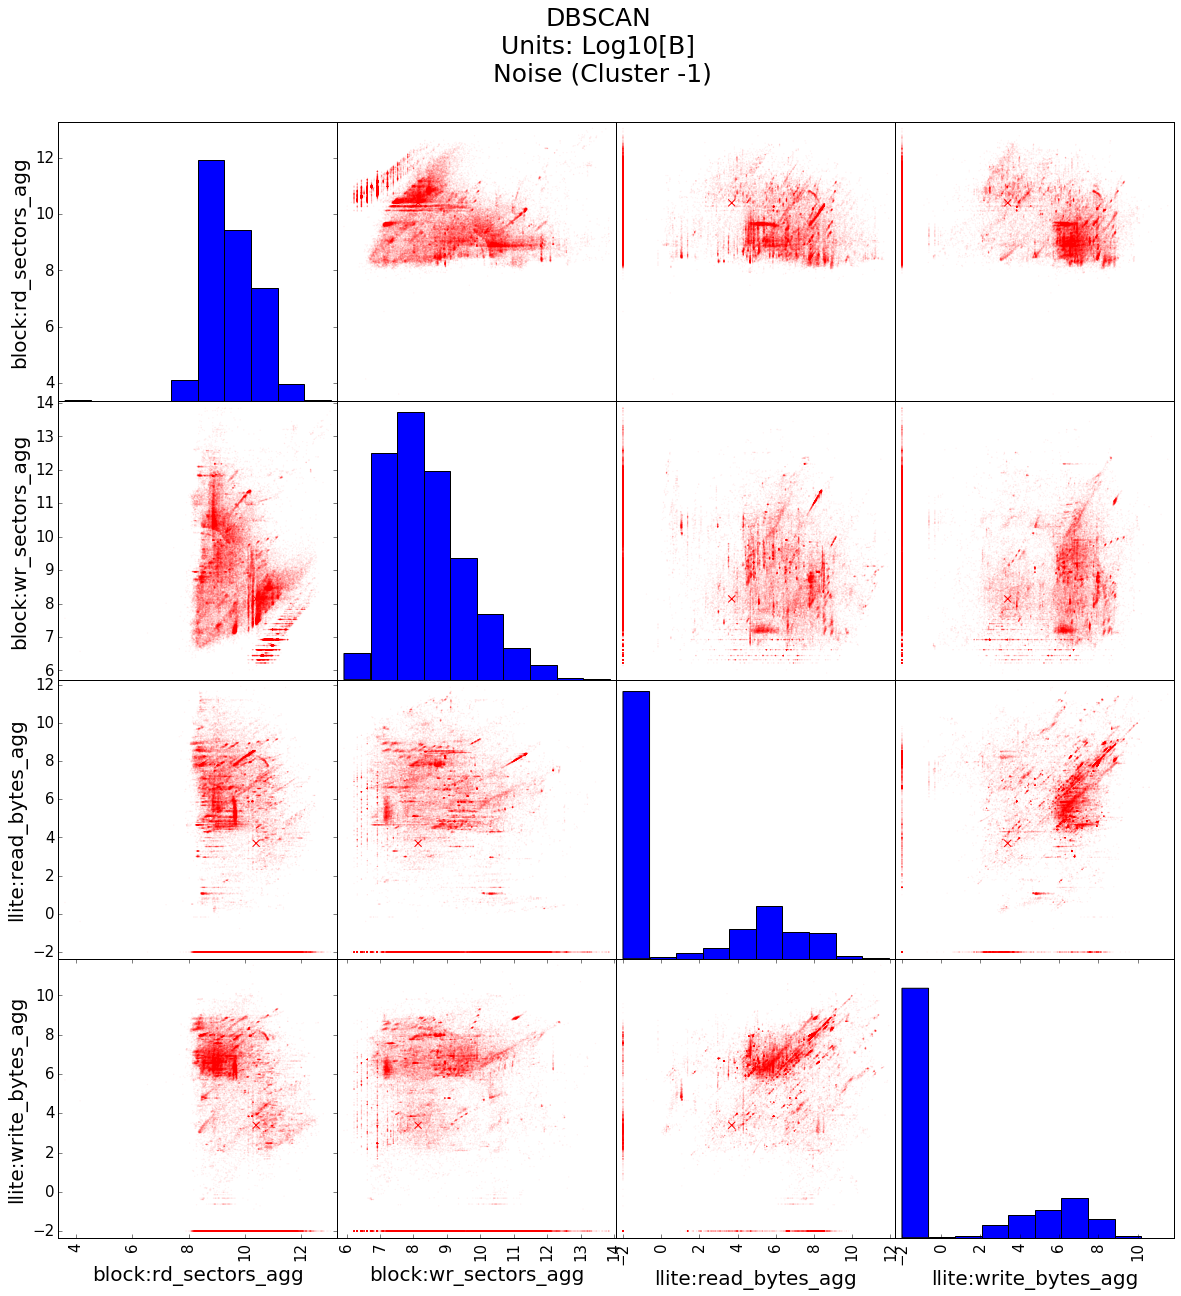

In [16]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df2 = pd.read_csv('Clean_NFS_150/clusterID.csv.gz', compression='gzip')
df_center = pd.read_pickle('Clean_NFS_150/centers.pkl')

df3['JobID'] = df3['JobID'].astype('int')
df3 = df3.drop('UserID', axis=1)
df2['JobID'] = df2['JobID'].astype('int')
df2 = df2.drop('UserID', axis=1)
df = df3.merge(df2, how='inner', on='JobID')
ndf = df.drop(['Time','JobID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf[ndf.columns[0:-1]] = np.log10(ndf[ndf.columns[0:-1]])
ndf = ndf.replace([np.inf, -np.inf], -2)

colors={
       0:'None', 
       1:'None',
       2:'None',
       3:'None',
       4:'None',
       5:'None',
       6:'None',
       7:'None',
       8:'None',
       9:'None',
       10:'None',
       11:'None',
       12:'None',
       -1:'r'
       }

ndf['Clusters'] = ndf['Clusters'].apply(lambda x: colors[x])
axl = scatter_matrix(ndf, alpha=0.05, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2, c=ndf['Clusters']);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        if i != j:  # only the scatter plots
            x = np.log10(df_center[ndf.columns[j]])
            y = np.log10(df_center[ndf.columns[i]])
            ax.scatter(x,y, s=50, marker='x', c=colors.values())

plt.suptitle('DBSCAN\nUnits: Log10[B]\n Noise (Cluster -1)', fontsize=25);

####Analysis:
- Cluster -1 captured most of the linear patterns that we have noticed on "No Cluster".
- Now that we know what "Noise" looks like, we will now know what we will be removing from our data.

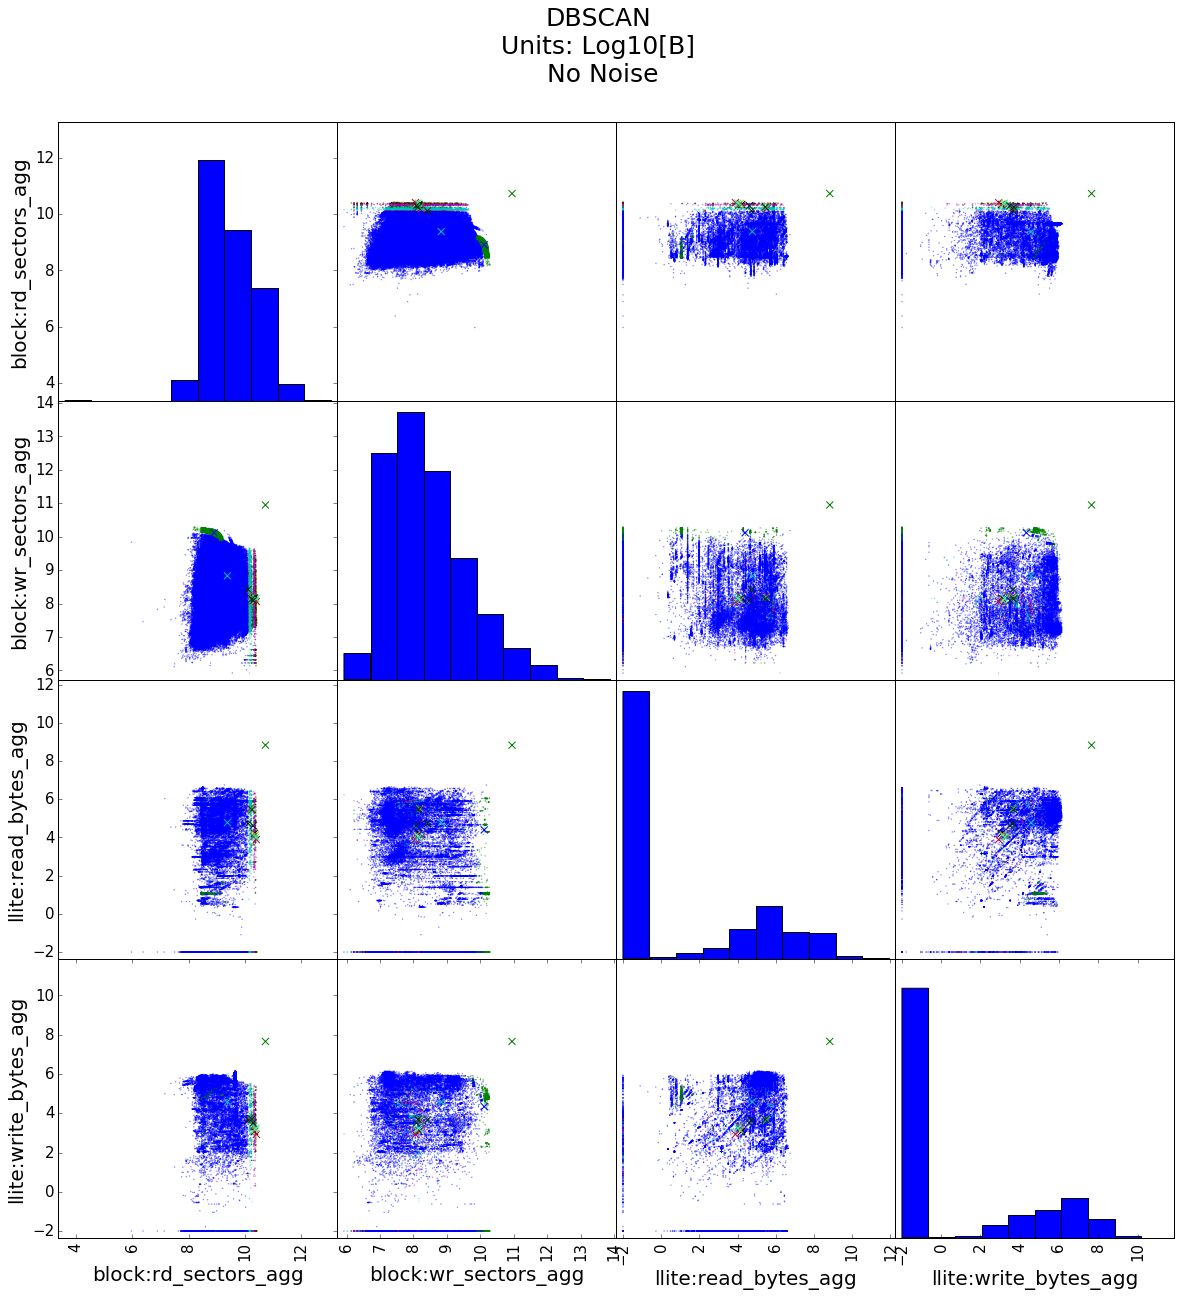

In [17]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df2 = pd.read_csv('Clean_NFS_150/clusterID.csv.gz', compression='gzip')
df_center = pd.read_pickle('Clean_NFS_150/centers.pkl')

df3['JobID'] = df3['JobID'].astype('int')
df3 = df3.drop('UserID', axis=1)
df2['JobID'] = df2['JobID'].astype('int')
df2 = df2.drop('UserID', axis=1)
df = df3.merge(df2, how='inner', on='JobID')
ndf = df.drop(['Time','JobID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf[ndf.columns[0:-1]] = np.log10(ndf[ndf.columns[0:-1]])
ndf = ndf.replace([np.inf, -np.inf], -2)

colors={
       0:'g', 
       1:'b',
       2:'c',
       3:'m',
       4:'k',
       5:'y',
       6:'#b80934',
       7:'#003300',
       8:'#00e600',
       9:'#666633',
       10:'#1affc6',
       11:'#003326',
       12:'#002633',
       -1:'None'
       }

ndf['Clusters'] = ndf['Clusters'].apply(lambda x: colors[x])
axl = scatter_matrix(ndf, alpha=0.5, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2, c=ndf['Clusters']);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        if i != j:  # only the scatter plots
            x = np.log10(df_center[ndf.columns[j]])
            y = np.log10(df_center[ndf.columns[i]])
            ax.scatter(x,y, s=50, marker='x', c=colors.values())

plt.suptitle('DBSCAN\nUnits: Log10[B]\n No Noise', fontsize=25);

####Analysis:
- The blue cluster makes it difficult to see the other clusters. 
- The blue pattern seems to capture more of the linear patterns but the alpha value is too high.
- Let's analyze the blue cluster at a lower alpha value without removing it.

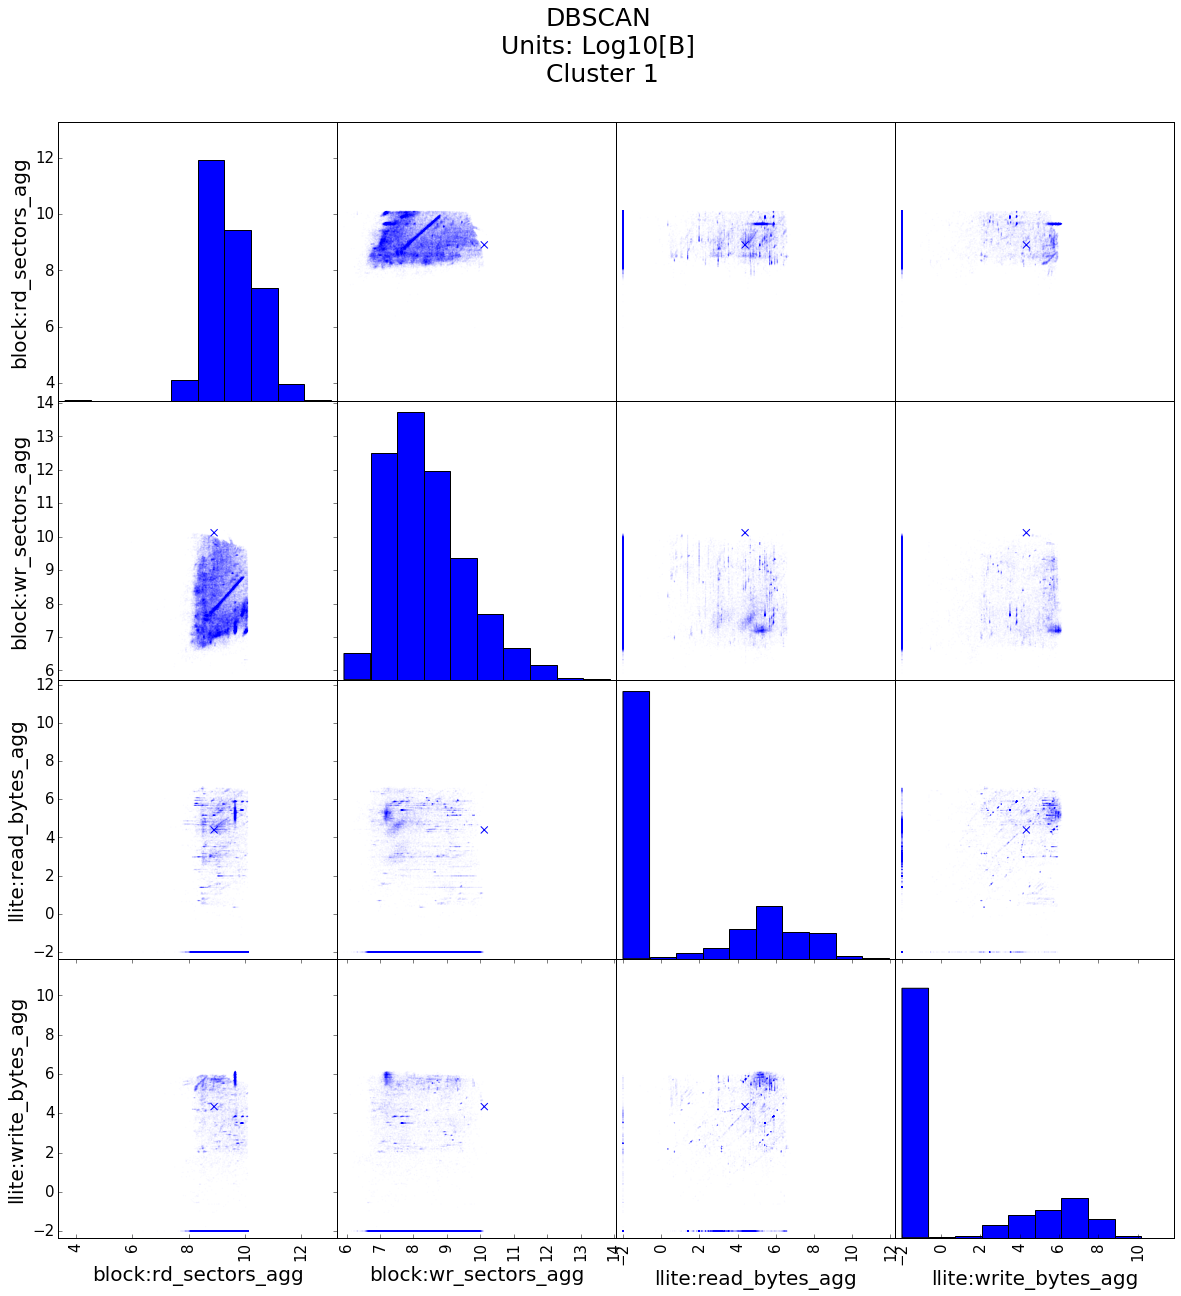

In [18]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df2 = pd.read_csv('Clean_NFS_150/clusterID.csv.gz', compression='gzip')
df_center = pd.read_pickle('Clean_NFS_150/centers.pkl')

df3['JobID'] = df3['JobID'].astype('int')
df3 = df3.drop('UserID', axis=1)
df2['JobID'] = df2['JobID'].astype('int')
df2 = df2.drop('UserID', axis=1)
df = df3.merge(df2, how='inner', on='JobID')
ndf = df.drop(['Time','JobID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf[ndf.columns[0:-1]] = np.log10(ndf[ndf.columns[0:-1]])
ndf = ndf.replace([np.inf, -np.inf], -2)

colors={
       0:'None', 
       1:'b',
       2:'None',
       3:'None',
       4:'None',
       5:'None',
       6:'None',
       7:'None',
       8:'None',
       9:'None',
       10:'None',
       11:'None',
       12:'None',
       -1:'None'
       }

ndf['Clusters'] = ndf['Clusters'].apply(lambda x: colors[x])
axl = scatter_matrix(ndf, alpha=0.02, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2, c=ndf['Clusters']);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        if i != j:  # only the scatter plots
            x = np.log10(df_center[ndf.columns[j]])
            y = np.log10(df_center[ndf.columns[i]])
            ax.scatter(x,y, s=50, marker='x', c=colors.values())

plt.suptitle('DBSCAN\nUnits: Log10[B]\n Cluster 1', fontsize=25);

####Analysis:
- The blue cluster captured the strong linear pattern on block read vs block write (see section "no cluster").
- Now that we know what is in the blue cluster, we can safely remove it.

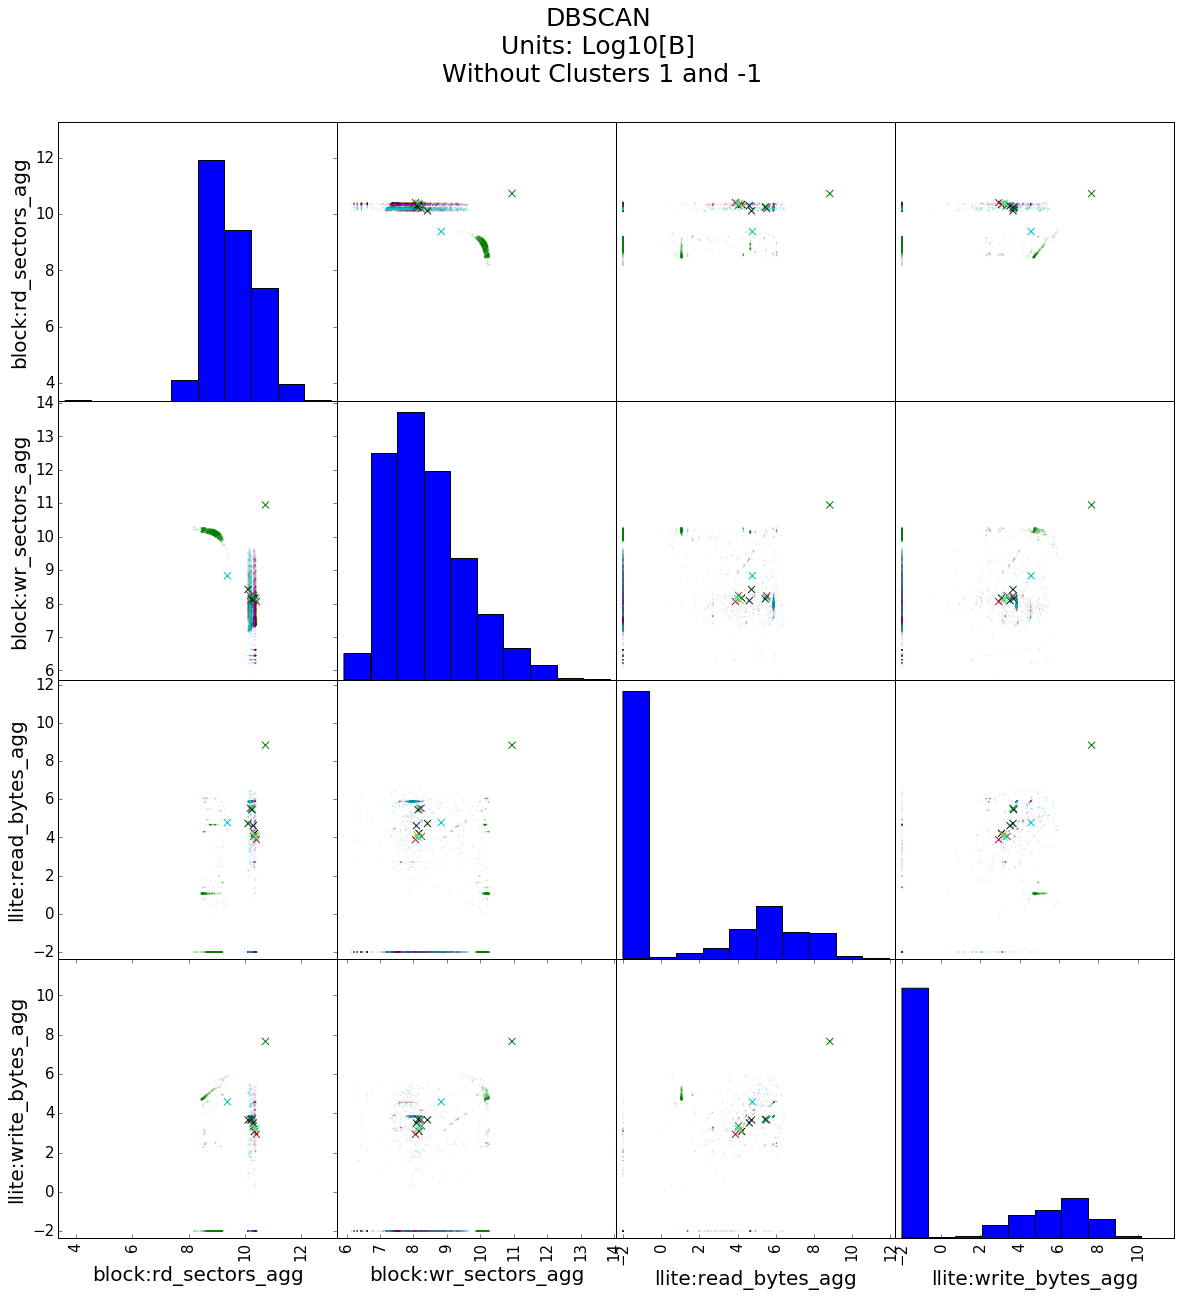

In [19]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df2 = pd.read_csv('Clean_NFS_150/clusterID.csv.gz', compression='gzip')
df_center = pd.read_pickle('Clean_NFS_150/centers.pkl')

df3['JobID'] = df3['JobID'].astype('int')
df3 = df3.drop('UserID', axis=1)
df2['JobID'] = df2['JobID'].astype('int')
df2 = df2.drop('UserID', axis=1)
df = df3.merge(df2, how='inner', on='JobID')
ndf = df.drop(['Time','JobID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf[ndf.columns[0:-1]] = np.log10(ndf[ndf.columns[0:-1]])
ndf = ndf.replace([np.inf, -np.inf], -2)

colors={
       0:'g', 
       1:'None',
       2:'c',
       3:'m',
       4:'k',
       5:'y',
       6:'#b80934',  #pinkish purple
       7:'#003300',  #olive green
       8:'#00e600',  #bright grass green
       9:'#666633',  #brown...trending green... breen?
       10:'#1affc6', #blue green
       11:'#003326', #vermillion
       12:'#002633', #deep blue-grey
       -1:'None'
       }

ndf['Clusters'] = ndf['Clusters'].apply(lambda x: colors[x])
axl = scatter_matrix(ndf, alpha=0.1, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2, c=ndf['Clusters']);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        if i != j:  # only the scatter plots
            x = np.log10(df_center[ndf.columns[j]])
            y = np.log10(df_center[ndf.columns[i]])
            ax.scatter(x,y, s=50, marker='x', c=colors.values())

plt.suptitle('DBSCAN\nUnits: Log10[B]\n Without Clusters 1 and -1', fontsize=25);

####Analysis:
- The olive green cluster (7) shows a distinct quarter ring patter for block read vs block write. The SSD I/O usage ranges between 1-10 GB. In comparison, the olive green cluster forms a small line on Lustre read vs Lustre write. The Lustre read is relatively constant around 10 B while the Lustre write ranges between 100 kB to 1 MB.

In [20]:
df_center = pd.read_pickle('Clean_NFS_150/centers.pkl')
df_center

block:rd_sectors_agg  block:wr_sectors_agg  llite:read_bytes_agg  \
Clusters                                                                     
-1                5.394765e+10          8.863698e+10          6.680496e+08   
 0                8.090738e+08          1.313945e+10          2.456150e+04   
 1                2.404877e+09          6.776671e+08          5.931796e+04   
 2                1.570737e+10          1.700242e+08          3.377846e+05   
 3                2.212411e+10          1.464020e+08          1.634698e+04   
 4                2.403117e+10          1.259803e+08          1.344197e+04   
 5                2.561917e+10          1.150558e+08          7.690214e+03   
 6                1.308943e+10          2.636339e+08          5.336230e+04   
 7                1.755402e+10          1.534007e+08          3.250920e+05   
 8                2.049748e+10          1.751846e+08          1.125317e+04   
 9                2.465222e+10          1.421612e+08          1.016537e+04   
 10               1.782476e+10          1.377254e+08          2.802353e+05   
 11               1.995455e+10          1.224701e+08          4.115466e+04   
 12               2.517120e+10          1.378369e+08          4.911120e+03   

          llite:write_bytes_agg  
Clusters                         
-1                 4.563252e+07  
 0                 2.179290e+04  
 1                 3.807101e+04  
 2                 4.669439e+03  
 3                 1.183260e+03  
 4                 1.441029e+03  
 5                 8.444294e+02  
 6                 4.556725e+03  
 7                 4.495567e+03  
 8                 2.273450e+03  
 9                 1.708046e+03  
 10                4.897019e+03  
 11                3.186445e+03  
 12                2.440330e+03

####Cluster 7 Composition 
             Count  Percentage
    crl231    183   71.206226
    sds121     16    6.225681
    nwu118      9    3.501946
    uic151      6    2.334630
    csd403      6    2.334630

####Analysis of Job Names
- Cluster 7 shows plenty of "sve1c6w*" from crl231. (Bioinformatics) 

####DBSCAN Attempts and Conclusions:
- The DBSCAN clustering of minPts=150 threw away almost half of the jobs as noise. Futher attempts were made with minPts value as low as 50. Even at low minPts value, ~50% of the jobs were discarded as noise (assigned to Cluster -1). Hence, we were unnable to extract more information from DBSCAN.

#Further Analysis on SDD_LINE1

SSD_LINE1 was produced by NSG and CIPRES jobs that should have been running on NFS. Time series analysis proved revealed that the I/O rates were too high to be considered to trivial background processing. 

In [21]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

cond1 = ndf['block:wr_sectors_agg']<(0.95*ndf['block:rd_sectors_agg'])-0.6
cond2 = ndf['block:wr_sectors_agg']>(0.95*ndf['block:rd_sectors_agg'])-0.7
cond3 = ndf['block:rd_sectors_agg']<10
cond4 = ndf['block:rd_sectors_agg']>8.9

#Getting JobNames
meta_df = ndf[cond1&cond2&cond3&cond4]  #For jobs on line

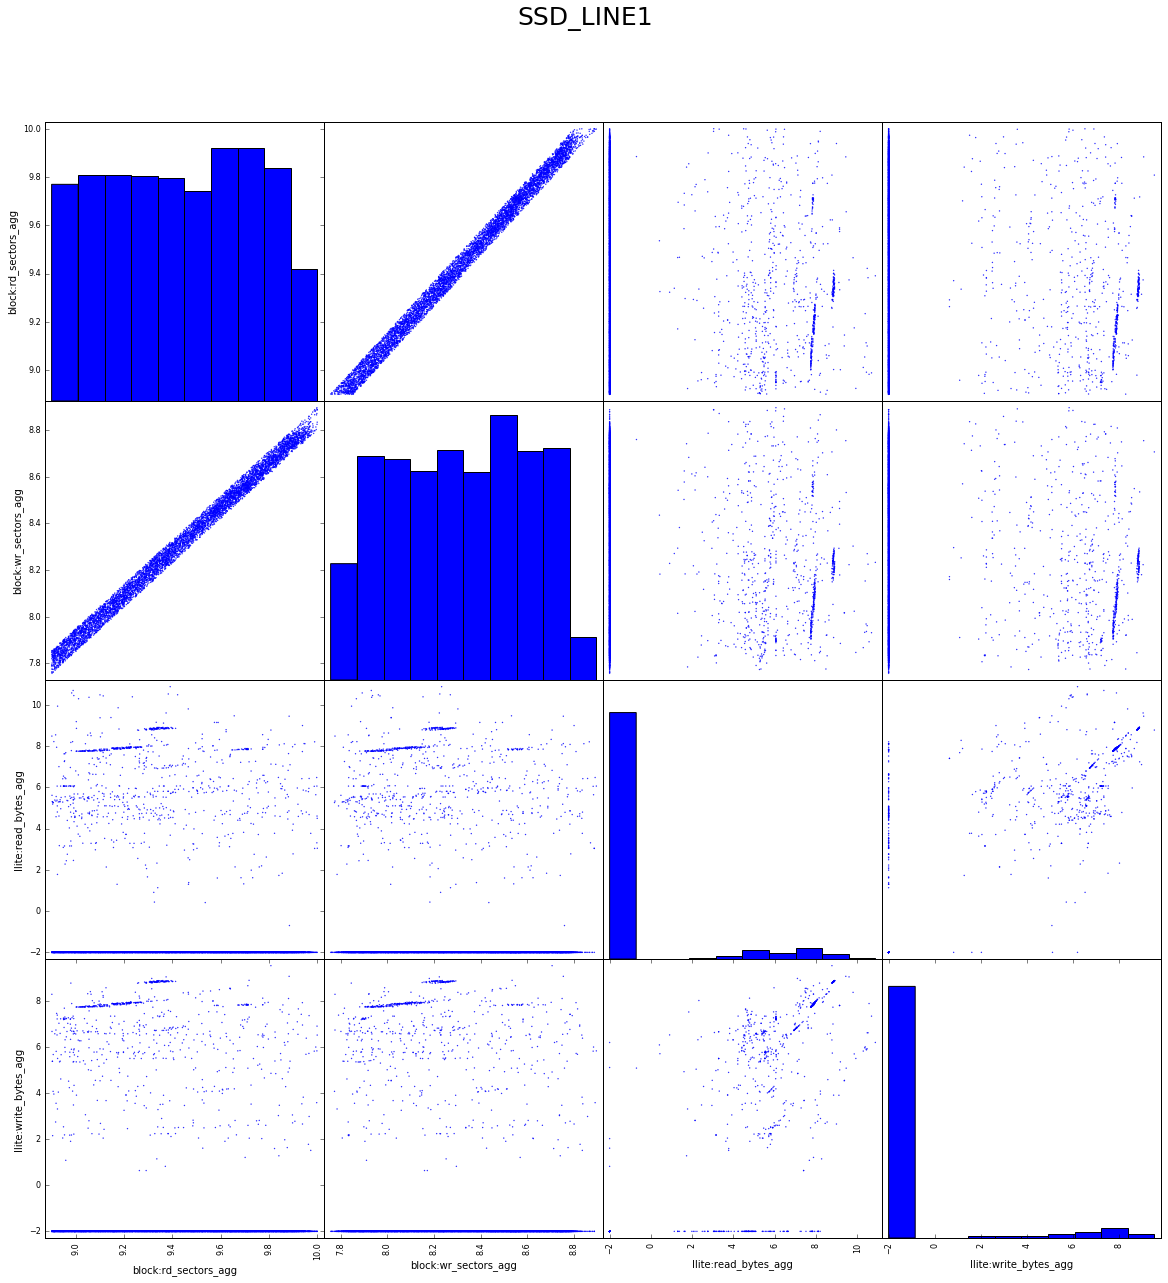

In [22]:
axl = scatter_matrix(meta_df, alpha=0.8, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2)

plt.suptitle('SSD_LINE1', fontsize=25);

####Analysis
- 

#Further Analysis on SDD_LINE2 and BRLR_LINE2

SSD_LINE2 and BRLR_LINE2 were produced by bioinformatics jobs from csd404.

In [23]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

cond1 = ndf['block:wr_sectors_agg']<(0.95*ndf['block:rd_sectors_agg'])+1.7
cond2 = ndf['block:wr_sectors_agg']>(0.95*ndf['block:rd_sectors_agg'])+1.6
cond3 = ndf['block:rd_sectors_agg']<10
cond4 = ndf['block:rd_sectors_agg']>9.5

#Getting JobNames
meta_df = ndf[cond1&cond2&cond3&cond4]  

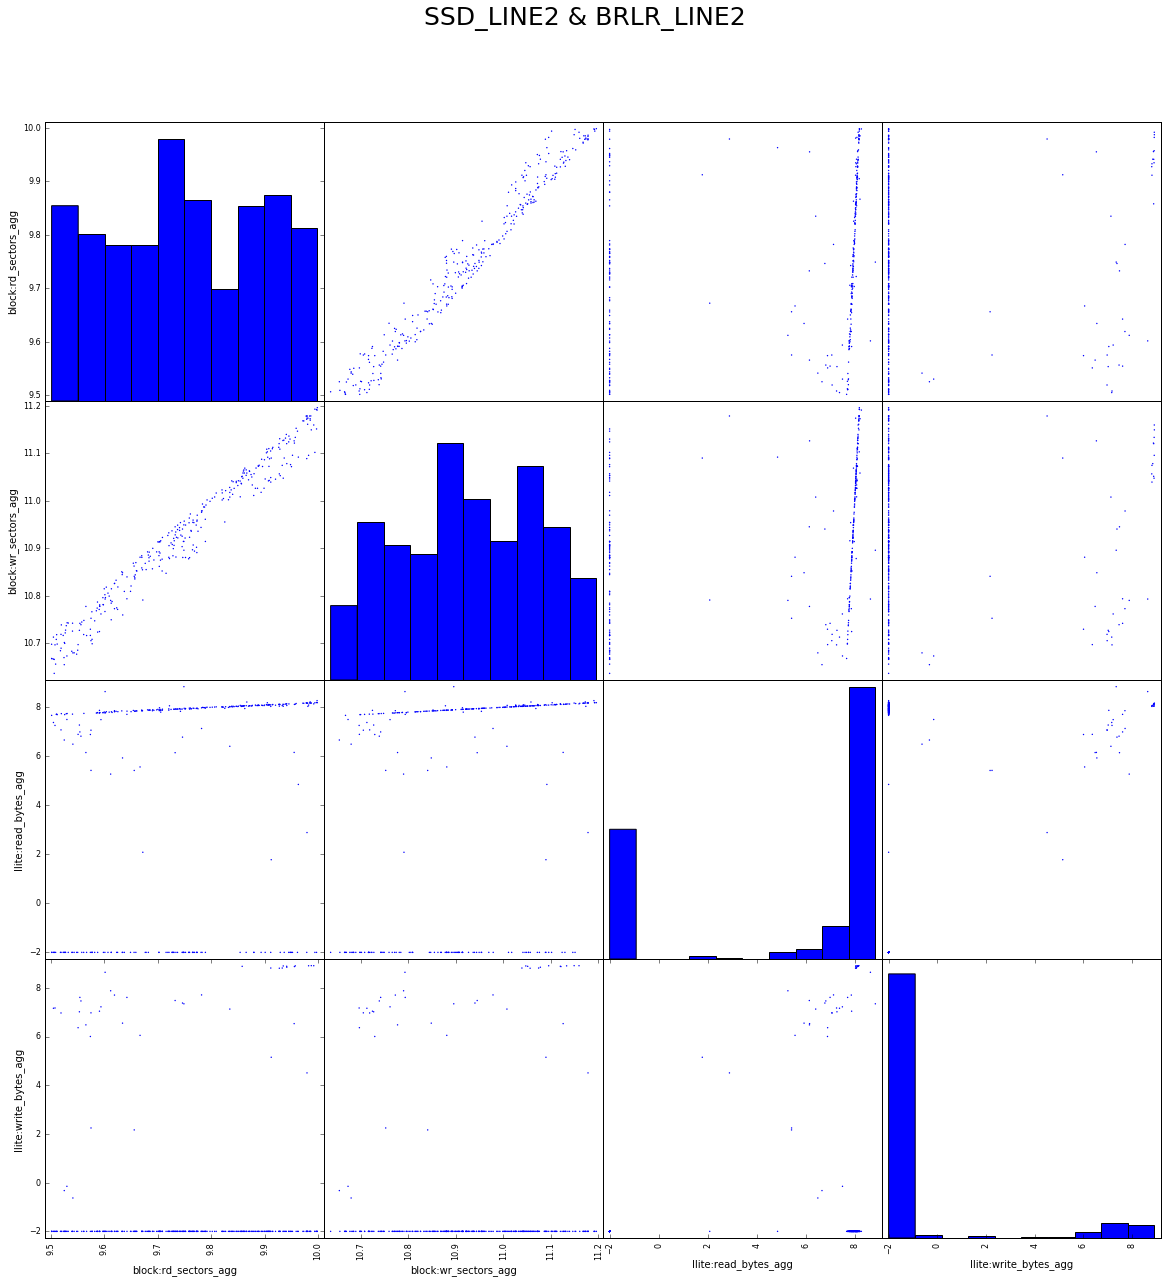

In [24]:
axl = scatter_matrix(meta_df, alpha=1, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2)

plt.suptitle('SSD_LINE2 & BRLR_LINE2', fontsize=25);

####Analysis
- 

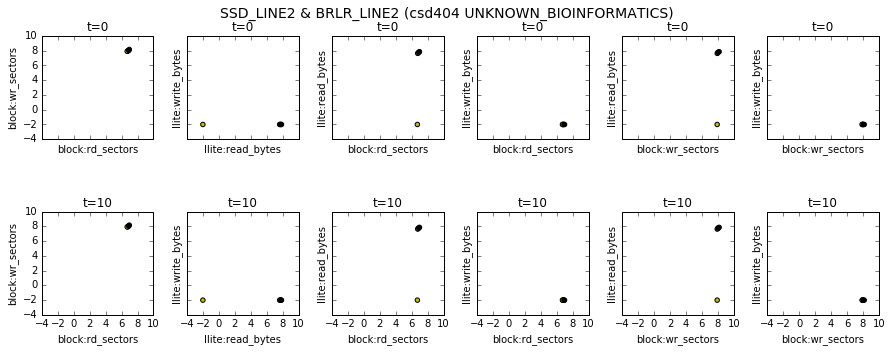

In [25]:
from numpy import inf

df2 = pd.read_pickle('clean_merged.pkl')

def fix_inf(x):
    np.place(x, x==-inf, -2)
    return x


# df = df[df['Nodes']==1]
io_columns = [
#         'nfs:normal_read', 'nfs:normal_write',
        'block:rd_sectors','block:wr_sectors', 
        'llite:read_bytes', 'llite:write_bytes'
        ]
df = df2[io_columns + ['JobID']].dropna()

jobs = ['680716','681144','677858','983067','685927']
# df = df[df['JobID'].isin(['698482','708683','954139','703429','912682'])]
df = df.loc[jobs,:]

#Get 1D array of log10 values
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.sum(x, axis=0))
    df[io] = df[io].apply(lambda x: np.log10(x))
    df[io] = df[io].apply(fix_inf)
#Highest time
max_time = df[io].apply(lambda x: len(x)).max()
#Add NaN
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.concatenate((x, [np.nan]*(max_time-len(x)))))
    
relationships = [
['block:rd_sectors','block:wr_sectors'], ['llite:read_bytes','llite:write_bytes'], \
['block:rd_sectors', 'llite:read_bytes'], ['block:rd_sectors', 'llite:write_bytes'], \
['block:wr_sectors','llite:read_bytes'], \
['block:wr_sectors', 'llite:write_bytes']
]


max_time = 2 #First 30 min

f, axarr = plt.subplots(max_time, len(relationships), sharex=True, sharey=True)
f.suptitle('SSD_LINE2 & BRLR_LINE2 (csd404 UNKNOWN_BIOINFORMATICS)', fontsize=14)
f.set_size_inches(15,5)
f.subplots_adjust(wspace=0.3, hspace=0.7)
# f.tight_layout()
for c, relation in enumerate(relationships):
    for r in range(max_time):
        t = r*10
        x = df[relation[0]].apply(lambda x: x[r])
        y = df[relation[1]].apply(lambda x: x[r])
        axarr[r,c].set_title('t='+str(t))
        axarr[r,c].set_xlabel(relation[0])
        axarr[r,c].set_ylabel(relation[1])
        axarr[r,c].scatter(x,y, c=['r','g','b','y','k'])

####Analysis
- Time series analysis could not be performed as RunTime was less than 10 min.

#Further Analysis on BRLR_LINE1 and BRLW_LINE1

BRLR_LINE1 and BRLW_LINE1 were produced VASP and NAMD applications and are most likely material science jobs.

In [26]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]

ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

cond1 = ndf['block:rd_sectors_agg']<9.7
cond2 = ndf['block:rd_sectors_agg']>9.6
cond3 = ndf['llite:write_bytes_agg']>4.8
cond4 = ndf['llite:write_bytes_agg']<6

#Getting JobNames
meta_df = ndf[cond1&cond2&cond3&cond4]

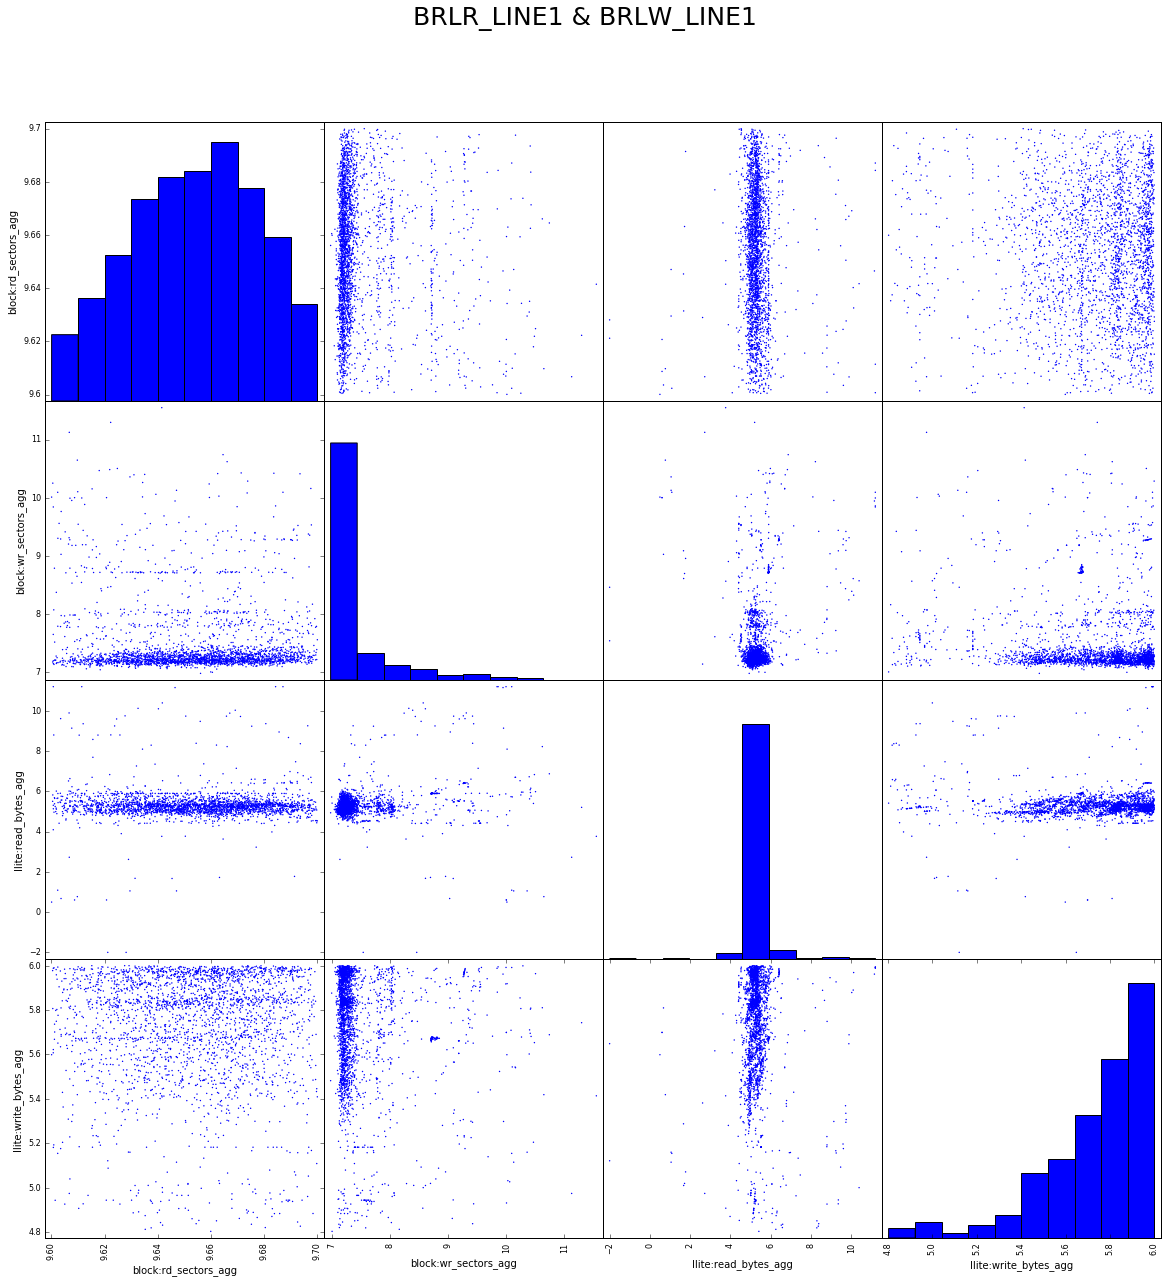

In [27]:
axl = scatter_matrix(meta_df, alpha=1, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2)

plt.suptitle('BRLR_LINE1 & BRLW_LINE1', fontsize=25);

####Analysis
- 

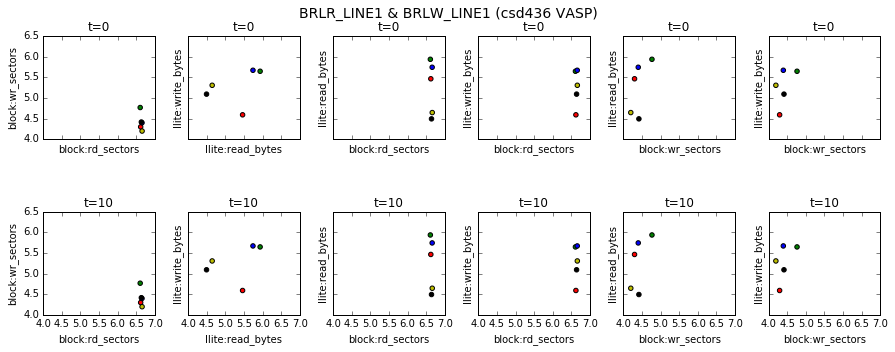

In [28]:
from numpy import inf

df2 = pd.read_pickle('clean_merged.pkl')

def fix_inf(x):
    np.place(x, x==-inf, -2)
    return x


# df = df[df['Nodes']==1]
io_columns = [
#         'nfs:normal_read', 'nfs:normal_write',
        'block:rd_sectors','block:wr_sectors', 
        'llite:read_bytes', 'llite:write_bytes'
        ]
df = df2[io_columns + ['JobID']].dropna()

jobs = ['582188','953142','954039','677265','647778']
# df = df[df['JobID'].isin(['698482','708683','954139','703429','912682'])]
df = df.loc[jobs,:]

#Get 1D array of log10 values
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.sum(x, axis=0))
    df[io] = df[io].apply(lambda x: np.log10(x))
    df[io] = df[io].apply(fix_inf)
#Highest time
max_time = df[io].apply(lambda x: len(x)).max()
#Add NaN
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.concatenate((x, [np.nan]*(max_time-len(x)))))
    
relationships = [
['block:rd_sectors','block:wr_sectors'], ['llite:read_bytes','llite:write_bytes'], \
['block:rd_sectors', 'llite:read_bytes'], ['block:rd_sectors', 'llite:write_bytes'], \
['block:wr_sectors','llite:read_bytes'], \
['block:wr_sectors', 'llite:write_bytes']
]


max_time = 2 #First 30 min

f, axarr = plt.subplots(max_time, len(relationships), sharex=True, sharey=True)
f.suptitle('BRLR_LINE1 & BRLW_LINE1 (csd436 VASP)', fontsize=14)
f.set_size_inches(15,5)
f.subplots_adjust(wspace=0.3, hspace=0.7)
# f.tight_layout()
for c, relation in enumerate(relationships):
    for r in range(max_time):
        t = r*10
        x = df[relation[0]].apply(lambda x: x[r])
        y = df[relation[1]].apply(lambda x: x[r])
        axarr[r,c].set_title('t='+str(t))
        axarr[r,c].set_xlabel(relation[0])
        axarr[r,c].set_ylabel(relation[1])
        axarr[r,c].scatter(x,y, c=['r','g','b','y','k'])

####Analysis
- Time series analysis could not be performed as RunTime was less than 10 min.

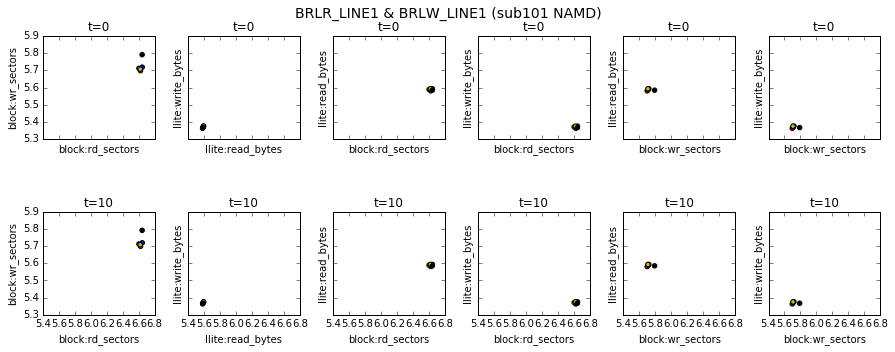

In [29]:
from numpy import inf

df2 = pd.read_pickle('clean_merged.pkl')

def fix_inf(x):
    np.place(x, x==-inf, -2)
    return x


# df = df[df['Nodes']==1]
io_columns = [
#         'nfs:normal_read', 'nfs:normal_write',
        'block:rd_sectors','block:wr_sectors', 
        'llite:read_bytes', 'llite:write_bytes'
        ]
df = df2[io_columns + ['JobID']].dropna()

jobs = ['698866','674325','678538','648731','705111']
# df = df[df['JobID'].isin(['698482','708683','954139','703429','912682'])]
df = df.loc[jobs,:]

#Get 1D array of log10 values
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.sum(x, axis=0))
    df[io] = df[io].apply(lambda x: np.log10(x))
    df[io] = df[io].apply(fix_inf)
#Highest time
max_time = df[io].apply(lambda x: len(x)).max()
#Add NaN
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.concatenate((x, [np.nan]*(max_time-len(x)))))
    
relationships = [
['block:rd_sectors','block:wr_sectors'], ['llite:read_bytes','llite:write_bytes'], \
['block:rd_sectors', 'llite:read_bytes'], ['block:rd_sectors', 'llite:write_bytes'], \
['block:wr_sectors','llite:read_bytes'], \
['block:wr_sectors', 'llite:write_bytes']
]


max_time = 2 #First 30 min

f, axarr = plt.subplots(max_time, len(relationships), sharex=True, sharey=True)
f.suptitle('BRLR_LINE1 & BRLW_LINE1 (sub101 NAMD)', fontsize=14)
f.set_size_inches(15,5)
f.subplots_adjust(wspace=0.3, hspace=0.7)
# f.tight_layout()
for c, relation in enumerate(relationships):
    for r in range(max_time):
        t = r*10
        x = df[relation[0]].apply(lambda x: x[r])
        y = df[relation[1]].apply(lambda x: x[r])
        axarr[r,c].set_title('t='+str(t))
        axarr[r,c].set_xlabel(relation[0])
        axarr[r,c].set_ylabel(relation[1])
        axarr[r,c].scatter(x,y, c=['r','g','b','y','k'])

####Analysis
- Time series analysis could not be performed as RunTime was less than 10 min.

#DBSCAN Cluster 7

DBSCAN Cluster 7 contains bioinformatics applications from crl231.

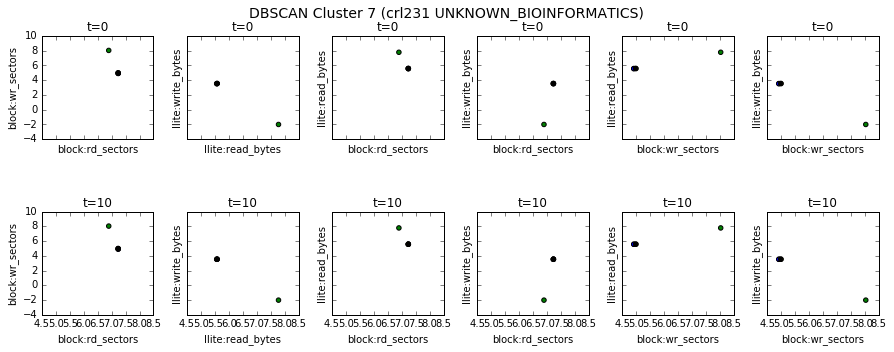

In [30]:
from numpy import inf

df2 = pd.read_pickle('clean_merged.pkl')

def fix_inf(x):
    np.place(x, x==-inf, -2)
    return x


# df = df[df['Nodes']==1]
io_columns = [
#         'nfs:normal_read', 'nfs:normal_write',
        'block:rd_sectors','block:wr_sectors', 
        'llite:read_bytes', 'llite:write_bytes'
        ]
df = df2[io_columns + ['JobID']].dropna()

jobs = ['954863','685927','961668','961498','961806']
# df = df[df['JobID'].isin(['698482','708683','954139','703429','912682'])]
df = df.loc[jobs,:]

#Get 1D array of log10 values
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.sum(x, axis=0))
    df[io] = df[io].apply(lambda x: np.log10(x))
    df[io] = df[io].apply(fix_inf)
#Highest time
max_time = df[io].apply(lambda x: len(x)).max()
#Add NaN
for io in io_columns:
    df[io] = df[io].apply(lambda x: np.concatenate((x, [np.nan]*(max_time-len(x)))))
    
relationships = [
['block:rd_sectors','block:wr_sectors'], ['llite:read_bytes','llite:write_bytes'], \
['block:rd_sectors', 'llite:read_bytes'], ['block:rd_sectors', 'llite:write_bytes'], \
['block:wr_sectors','llite:read_bytes'], \
['block:wr_sectors', 'llite:write_bytes']
]


max_time = 2 #First 30 min

f, axarr = plt.subplots(max_time, len(relationships), sharex=True, sharey=True)
f.suptitle('DBSCAN Cluster 7 (crl231 UNKNOWN_BIOINFORMATICS)', fontsize=14)
f.set_size_inches(15,5)
f.subplots_adjust(wspace=0.3, hspace=0.7)
# f.tight_layout()
for c, relation in enumerate(relationships):
    for r in range(max_time):
        t = r*10
        x = df[relation[0]].apply(lambda x: x[r])
        y = df[relation[1]].apply(lambda x: x[r])
        axarr[r,c].set_title('t='+str(t))
        axarr[r,c].set_xlabel(relation[0])
        axarr[r,c].set_ylabel(relation[1])
        axarr[r,c].scatter(x,y, c=['r','g','b','y','k'])

####Analysis
- Time series analysis could not be performed as RunTime was less than 10 min.

#Atleast 1 hour Jobs

When analyzing the lines, the jobs produced were too short (<10min) to produce any form of meaningful result.
Hence, we wish to look at all jobs that are atleast 1 hour long to help us analyze time series data from tacc stats (with a sampling rate of 10 min).

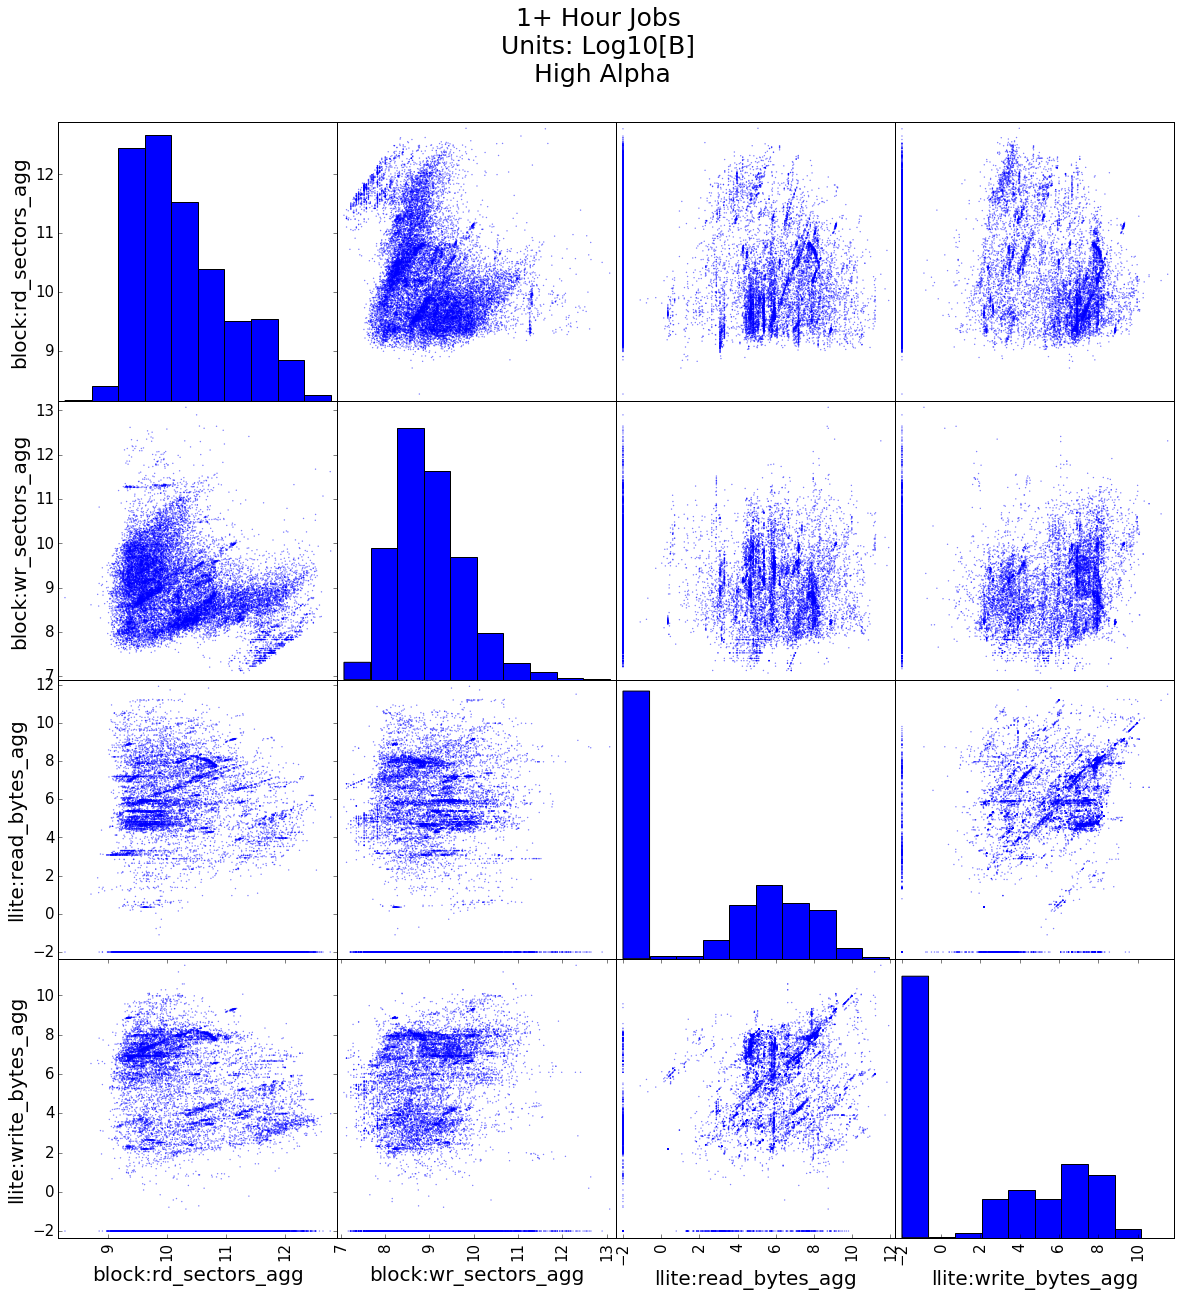

In [31]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df3['Time'] = df3['Time'].apply(lambda x : len(x))
df3 = df3[df3['Time']>6]
ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

axl = scatter_matrix(ndf, alpha=0.5, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

plt.suptitle('1+ Hour Jobs\nUnits: Log10[B]\n High Alpha', fontsize=25);

####Analysis
- No clear can be seen at high alpha values.

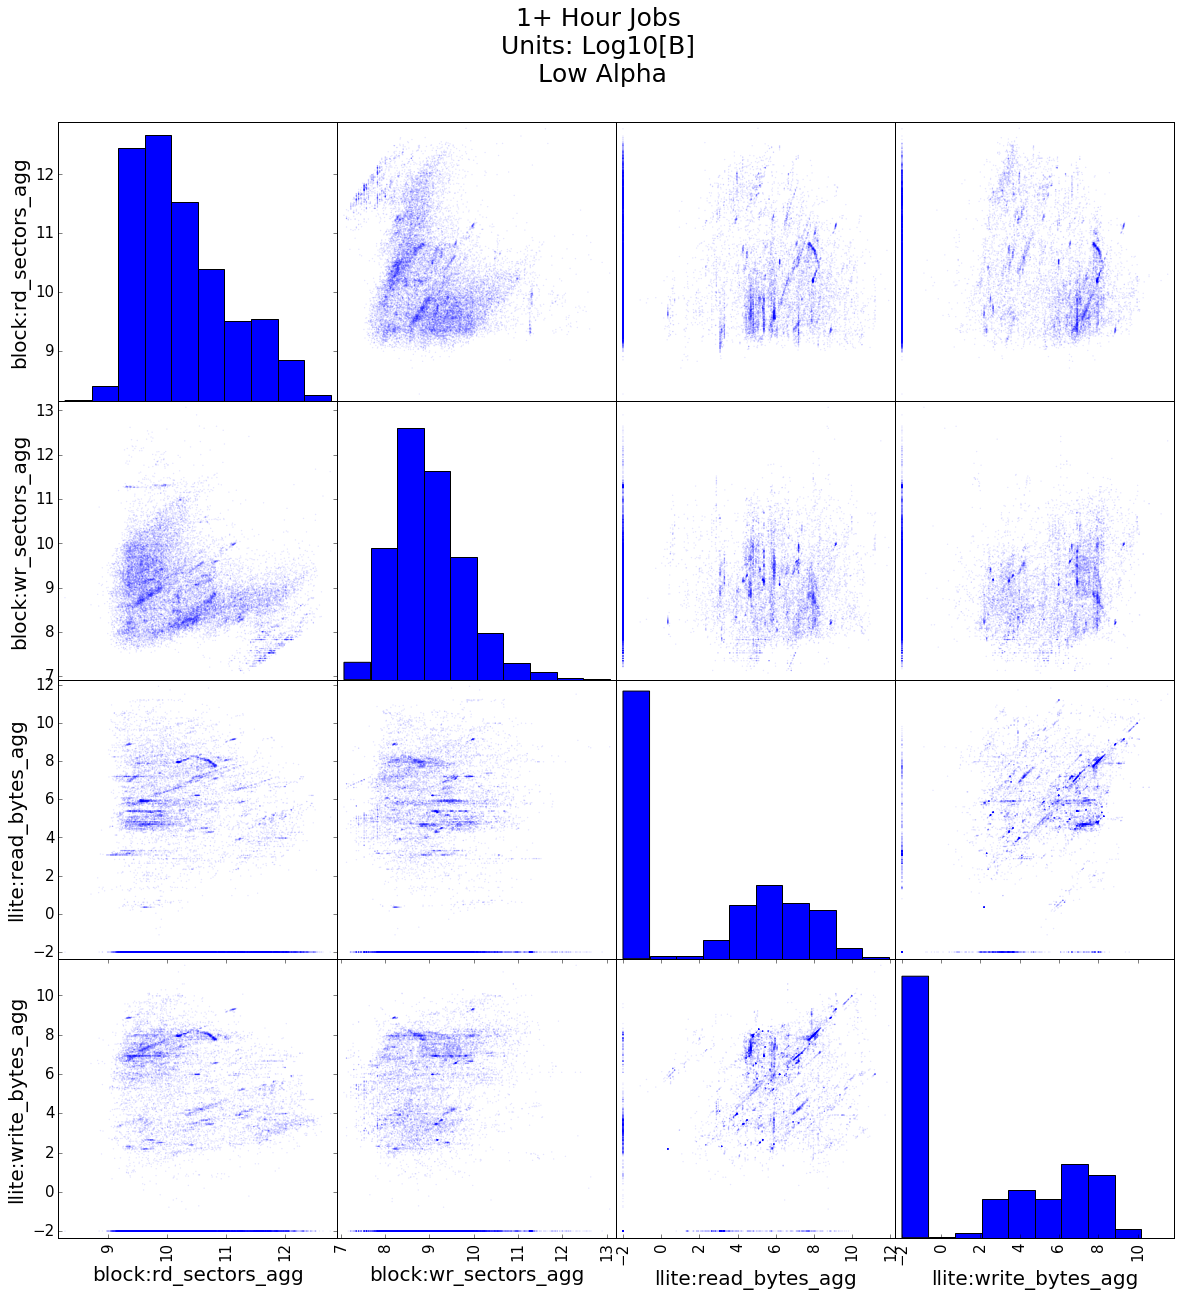

In [32]:
df3 = pd.read_pickle('agg2.pkl')
df3 = df3[df3.columns[2:]]
df3['Time'] = df3['Time'].apply(lambda x : len(x))
df3 = df3[df3['Time']>6]
ndf = df3.drop(['Time','JobID','UserID'], axis=1)
# ndf = ndf[ndf.columns[2:]]
ndf = np.log10(ndf)
ndf = ndf.replace([np.inf, -np.inf], -2)

axl = scatter_matrix(ndf, alpha=0.1, figsize=(20, 20), 
               diagonal='hist', grid=True, marker='o', edgecolors='none', 
               s=2);

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in axl.ravel()]

plt.suptitle('1+ Hour Jobs\nUnits: Log10[B]\n Low Alpha', fontsize=25);

####Analysis
- No clear pattern could be seen even at lower alpha values.